In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns

# Author: Martin Luessi <mluessi@nmr.mgh.harvard.edu>
# License: BSD (3-clause)
from matplotlib.colors import TwoSlopeNorm

import os.path as op
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

from mne_connectivity import spectral_connectivity_epochs, seed_target_indices
from mne.datasets import sample
from mne_connectivity.viz import plot_sensors_connectivity

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
dict015= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'dbs',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_imp = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','FT9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','FT10':'eeg','TP9':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'dbs',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_exp = dict015

dict011_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg','T7':'eeg','FT10':'eeg',
               'CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'FT9':'eeg', 'TP10':'eeg','P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg',
               'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
              'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'dbs',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict011_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FT10':'eeg', 'FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
               'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'TP9':'eeg', 'P8':'eeg','P4':'eeg','Pz':'eeg',
               'P3':'eeg','P7':'eeg','O2':'eeg', 'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs',
               'DBS6-7':'dbs','DBS7-8':'dbs', 'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'dbs',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg','DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs',
                'mean(DBS1-234, DBS234-567, DBS567-8)':'dbs','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FC6':'eeg', 'FC2':'eeg','FC1':'eeg','FC5':'eeg',
              'T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg', 'T7':'eeg','FT10':'eeg', 'CP6':'eeg','CP2':'eeg',
              'CP1':'eeg','CP5':'eeg','FT9':'eeg','TP10':'eeg', 'P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg',
              'O2':'eeg','O1':'eeg','DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs',
                'mean(DBS1-234, DBS234-567, DBS567-8)':'dbs','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_imp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg','DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs',
                'mean(DBS1-234, DBS234-567, DBS567-8)':'dbs','DynR':'misc','DynL':'misc','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_exp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P8':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg','O1':'eeg','DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs',
                'mean(DBS1-234, DBS234-567, DBS567-8)':'dbs','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict_eog= {'FP1':'eog'}

In [3]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011','013','014','015']

stage = ['implant']#, 'explant']
aff_cond = ['1', '101'];
aff_cond_plot = ['Standard', 'Oddball'];

naff_cond = ['10', '110'];

# layout
xy = pd.read_csv(base_dir+"xy_pos_layout.csv", header=None)
xy = np.array(xy)

ch_names = ['FP1','FP2','AF7','AF3','AFz','AF4','AF8','F7','F3','Fz','F4','F8','FT9','FC5','FC1','FC2','FC6',
'FT10','T7','C3','Cz','C4','T8','TP9','TP10','CP5','CP1','CP2','CP6','P7','P3','Pz','P4','P8','O1','O2',
'COMNT','SCALE']

layout = mne.channels.generate_2d_layout(xy, w=0.12, h=0.1, pad=0.02, ch_names=ch_names, ch_indices=None, name='eeg', bg_image=None, normalize=True)

tfr_odd=[]
tfr_typ=[]

for sub in subj_list:
    for st in stage:
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        fname = data_dir+"data_clean"+st+'.mat'
                
        if sub == '015' or sub=='014':
            dict1 = dict015
        elif sub == '013' and st== 'implant':
            dict1 = dict013_imp
        elif sub == '013' and st== 'explant':
            dict1 = dict013_exp
        elif sub == '011' and st== 'implant':
            dict1 = dict011_imp
        elif sub == '011' and st== 'explant':
            dict1 = dict011_exp
        elif sub == '008' and st== 'implant':
            dict1 = dict08_imp
        elif sub == '008' and st== 'explant':
            dict1 = dict08_exp
        elif sub == '007' and st== 'implant':
            dict1 = dict07_imp
        elif sub == '007' and st== 'explant':
            dict1 = dict07_exp


        info = mne.create_info(list(dict1.keys()), sfreq=200, ch_types='misc', verbose=None)
        epochs = mne.read_epochs_fieldtrip(fname,info,data_name='x', trialinfo_column=0)
        
        sfreq = epochs.info['sfreq']
        
        epochs.set_channel_types(dict1)
        epochs.set_eeg_reference("average")
        kind='easycap-M1'
        mon = mne.channels.make_standard_montage(kind, head_size='auto')
        epochs.set_montage(mon,on_missing='ignore')
        
        epochs.filter(1,40)

        # set up and fit the ICA
        ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter='auto')
        ica.fit(epochs)
        
        ica.exclude = []
    
        muscle_idx_auto, muscle_scores = ica.find_bads_muscle(epochs)
        #ref_idx_auto, ref_scores = ica.find_bads_ref(raw)
        #ecg_indices, ecg_scores = ica.find_bads_ecg(epochs, ch_name= 'FP1', method="correlation", threshold="auto")
        eog_indices, eog_scores = ica.find_bads_eog(epochs, ch_name = 'FP1')
        
        ica.exclude = muscle_idx_auto
        #ica.exclude.extend(ref_idx_auto)
        #ica.exclude.extend(ecg_indices)
        
        ica.exclude.extend(eog_indices)
        print(ica.exclude)
        
        ica.apply(epochs)

       
        epochs_aff_odd = epochs[aff_cond[1]]
        epochs_aff_typ = epochs[aff_cond[0]]

        mne.epochs.equalize_epoch_counts([epochs_aff_odd,epochs_aff_typ], method='truncate')
        
        picks = mne.pick_types(epochs_aff_odd.info, eeg=True, dbs=True, emg= False,stim=False, eog=False,
                               exclude='bads')

        epochs_aff_odd.set_channel_types(dict_eog)
        epochs_aff_typ.set_channel_types(dict_eog)
        
        epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])
        epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])

        
#epochs_aff_typ.filter(l_freq=0.1, h_freq=30)
#epochs_aff_odd.filter(l_freq=0.1, h_freq=30)


Adding metadata with 9 columns
404 matching events found
No baseline correction applied
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:53: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-234, DBS234-567, DBS567-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, Pz, T7, T8, TP10, TP9, mean(DBS1-234, DBS234-567, DBS567-8) has changed from NA to V.
  epochs.set_channel_types(dict1)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.4s
[Parallel(n_job

Fitting ICA to data using 38 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 87.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Using EOG channel: FP1
[0, 1, 2, 3, 4, 5, 8, 10, 13, 15, 16, 18, 19, 18]
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 13 ICA components
    Projecting back using 38 PCA components
Dropped 0 epochs: 
Dropped 99 epochs: 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146
    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:93: RuntimeWarning: This filename (E:/Oddball Data/EDEN007/ANALYSIS/data_clean_mne_implantOddball) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])


    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:94: RuntimeWarning: This filename (E:/Oddball Data/EDEN007/ANALYSIS/data_clean_mne_implantStandard) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])


Adding metadata with 9 columns
431 matching events found
No baseline correction applied
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:53: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-234, DBS234-567, DBS567-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, Pz, T7, T8, TP10, TP9, mean(DBS1-234, DBS234-567, DBS567-8) has changed from NA to V.
  epochs.set_channel_types(dict1)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.2s
[Parallel(n_job

Fitting ICA to data using 38 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 96.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Using EOG channel: FP1
[0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 0]
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 14 ICA components
    Projecting back using 38 PCA components
Dropped 0 epochs: 
Dropped 103 epochs: 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152
    Writing channel names to FIF truncated to 15 characters with

C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:93: RuntimeWarning: This filename (E:/Oddball Data/EDEN008/ANALYSIS/data_clean_mne_implantOddball) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])


    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:94: RuntimeWarning: This filename (E:/Oddball Data/EDEN008/ANALYSIS/data_clean_mne_implantStandard) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])


Adding metadata with 9 columns
600 matching events found
No baseline correction applied
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:53: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS2-3, DBS3-4, DBS4-5, DBS5-6, DBS6-7, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, P7, Pz, T7, T8, TP10, mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8) has changed from NA to V.
  epochs.set_channel_types(dict1)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    3.1s
[Parallel(n_job

Fitting ICA to data using 42 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 254.8s.
    Using multitaper spectrum estimation with 7 DPSS windows
Using EOG channel: FP1
[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 18]
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 15 ICA components
    Projecting back using 42 PCA components
Dropped 0 epochs: 
Dropped 144 epochs: 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,

C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:93: RuntimeWarning: This filename (E:/Oddball Data/EDEN011/ANALYSIS/data_clean_mne_implantOddball) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])


    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:94: RuntimeWarning: This filename (E:/Oddball Data/EDEN011/ANALYSIS/data_clean_mne_implantStandard) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])


Adding metadata with 9 columns
599 matching events found
No baseline correction applied
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:53: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS2-3, DBS3-4, DBS4-5, DBS5-6, DBS6-7, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, P8, Pz, T7, T8, TP9, mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8) has changed from NA to V.
  epochs.set_channel_types(dict1)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.0s
[Parallel(n_job

Fitting ICA to data using 42 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 176.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Using EOG channel: FP1
[1, 3, 4, 7, 10, 12, 13, 14, 18]
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 9 ICA components
    Projecting back using 42 PCA components
Dropped 0 epochs: 
Dropped 145 epochs: 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 1

C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:93: RuntimeWarning: This filename (E:/Oddball Data/EDEN013/ANALYSIS/data_clean_mne_implantOddball) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])


    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:94: RuntimeWarning: This filename (E:/Oddball Data/EDEN013/ANALYSIS/data_clean_mne_implantStandard) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])


Adding metadata with 9 columns
494 matching events found
No baseline correction applied
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:53: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS2-3, DBS3-4, DBS4-5, DBS5-6, DBS6-7, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, P7, P8, Pz, T7, T8, TP10, TP9, mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8) has changed from NA to V.
  epochs.set_channel_types(dict1)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.5s
[Parallel(n_job

Fitting ICA to data using 44 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 141.1s.
    Using multitaper spectrum estimation with 7 DPSS windows
Using EOG channel: FP1
[0, 1, 2, 3, 4, 7, 8, 9, 12, 13, 17, 18, 19, 9]
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 13 ICA components
    Projecting back using 44 PCA components
Dropped 0 epochs: 
Dropped 117 epochs: 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177

C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:93: RuntimeWarning: This filename (E:/Oddball Data/EDEN014/ANALYSIS/data_clean_mne_implantOddball) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])


    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:94: RuntimeWarning: This filename (E:/Oddball Data/EDEN014/ANALYSIS/data_clean_mne_implantStandard) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])


Adding metadata with 9 columns
445 matching events found
No baseline correction applied
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:53: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS2-3, DBS3-4, DBS4-5, DBS5-6, DBS6-7, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, P7, P8, Pz, T7, T8, TP10, TP9, mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8) has changed from NA to V.
  epochs.set_channel_types(dict1)


Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.6s
[Parallel(n_job

Fitting ICA to data using 44 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 89.9s.
    Using multitaper spectrum estimation with 7 DPSS windows
Using EOG channel: FP1
[0, 1, 2, 3, 4, 6, 8, 9, 12, 13, 15, 17, 18]
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 13 ICA components
    Projecting back using 44 PCA components
Dropped 0 epochs: 
Dropped 92 epochs: 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143
    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:93: RuntimeWarning: This filename (E:/Oddball Data/EDEN015/ANALYSIS/data_clean_mne_implantOddball) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_odd.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[1])


    Writing channel names to FIF truncated to 15 characters with remapping


C:\Users\malann\AppData\Local\Temp\ipykernel_373220\583383490.py:94: RuntimeWarning: This filename (E:/Oddball Data/EDEN015/ANALYSIS/data_clean_mne_implantStandard) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_aff_typ.save(data_dir+"data_clean_mne_"+st+aff_cond_plot[0])


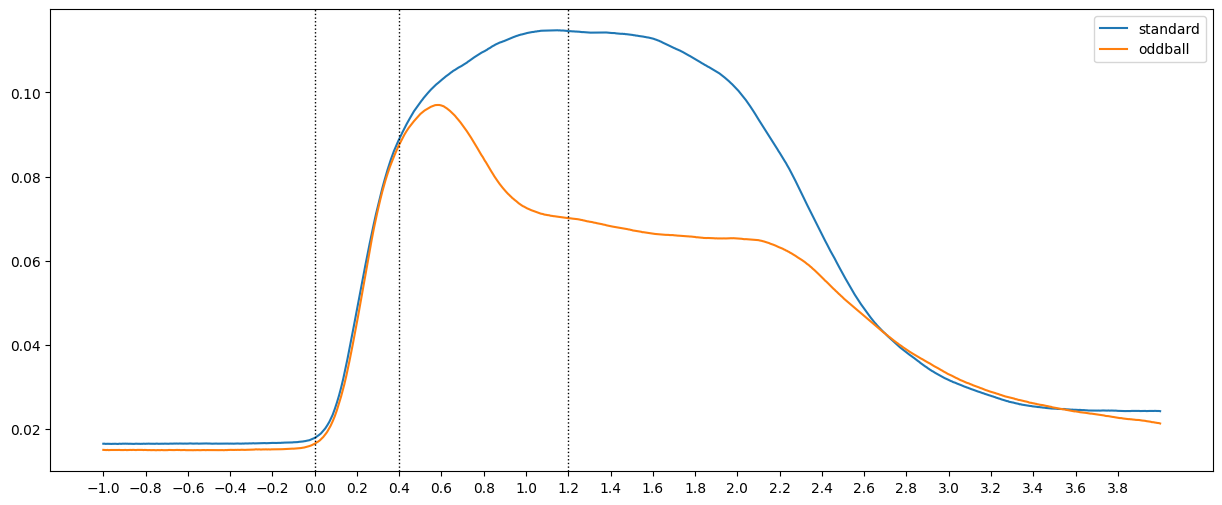

In [144]:
Dynmo_odd = epochs_aff_odd.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_odd= Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2]).mean(axis=0)

Dynmo_typ = epochs_aff_typ.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)

plt.figure(figsize=(15,6))

time= epochs_aff_typ.copy().crop(-1,tmax).times

plt.plot(epochs_aff_typ.copy().crop(-1,tmax).times,Dynmo_typ)
plt.plot(epochs_aff_odd.copy().crop(-1,tmax).times,Dynmo_odd)

x=np.arange(-1,tmax,0.2)

plt.xticks(x)
idx = np.argwhere(np.diff(np.sign(Dynmo_typ - Dynmo_odd))).flatten()

plt.axvline(0, linewidth=1, color="black", linestyle=":")

if sub =="015":
    plt.plot(time[idx], Dynmo_typ[idx], 'ro')
    plt.axvline(time[idx], linewidth=1, color="black", linestyle=":")

else:
    plt.axvline(0.4, linewidth=1, color="black", linestyle=":")
    plt.axvline(1.2, linewidth=1, color="black", linestyle=":")

plt.legend(['standard','oddball'])

# Event-Related Potentials

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


C:\Users\malann\AppData\Local\Temp\ipykernel_302184\3457044569.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_odd.plot()


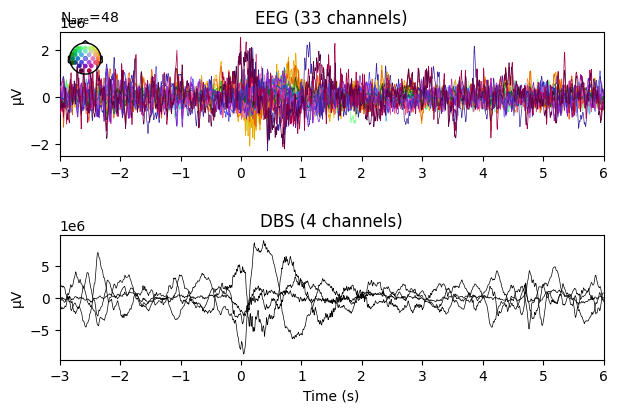

C:\Users\malann\AppData\Local\Temp\ipykernel_302184\3457044569.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_typ.plot()


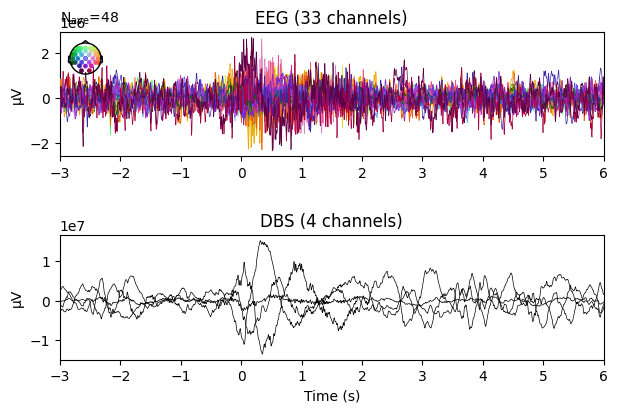

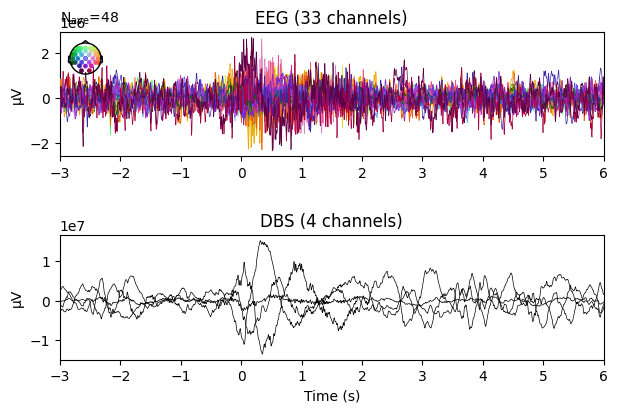

In [149]:
evoked_odd = epochs_aff_odd.average()
evoked_typ = epochs_aff_typ.average()
evoked_odd.apply_baseline((-3,-2))
evoked_typ.apply_baseline((-3,-2))
evoked_odd.plot()
evoked_typ.plot()

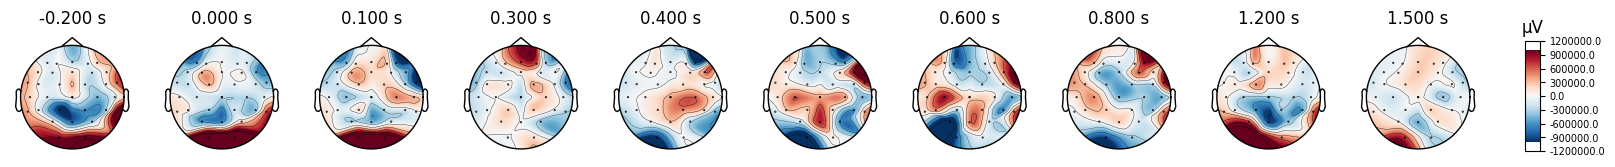

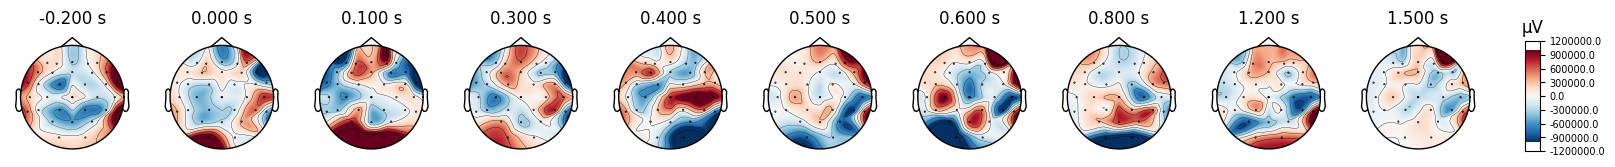

In [148]:
vmin,vmax= -1e6, 1e6
if sub =="015":
    fig1 = evoked_odd.plot_topomap(times=[-0.2, 0, 0.1, 0.2, 0.3, 0.4, time[idx][0],  0.8, 1, 1.2, 1.5], vlim=(vmin,vmax))
    fig2 = evoked_typ.plot_topomap(times=[-0.2, 0, 0.1, 0.2, 0.3, 0.4, time[idx][0],  0.8, 1, 1.2, 1.5], vlim=(vmin,vmax))
else:
    fig1 = evoked_odd.plot_topomap(times=[-0.2, 0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.8, 1.2, 1.5], vlim=(vmin,vmax))
    fig2 = evoked_typ.plot_topomap(times=[-0.2, 0, 0.1, 0.3, 0.4, 0.5 ,0.6, 0.8, 1.2, 1.5], vlim=(vmin,vmax))

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


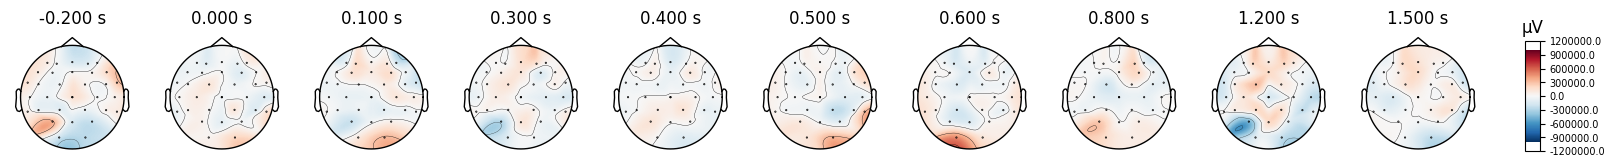

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


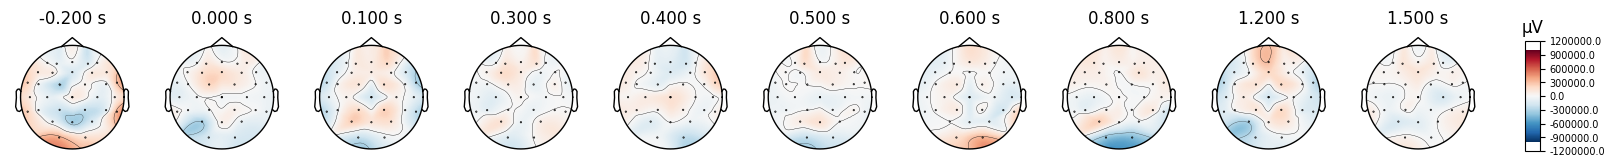

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


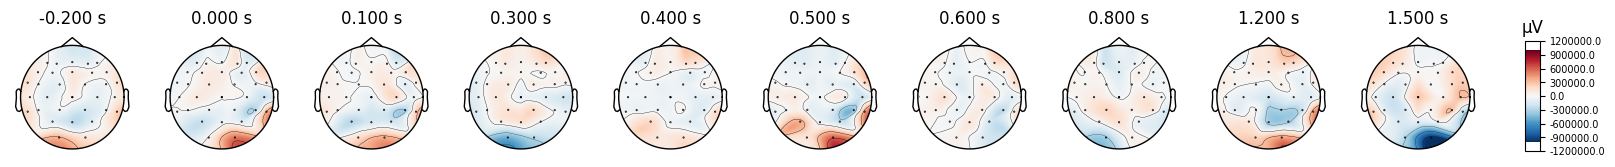

Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


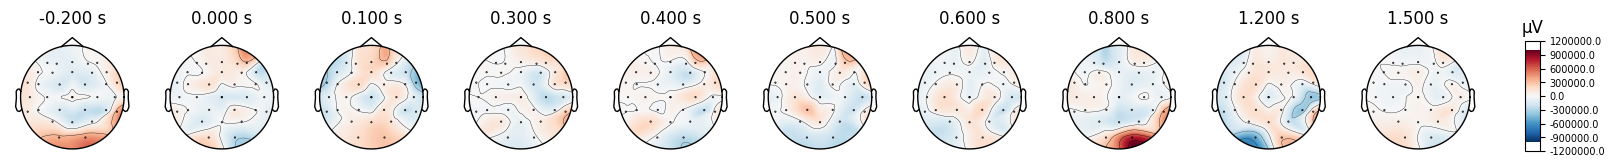

Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 205 samples (1.025 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


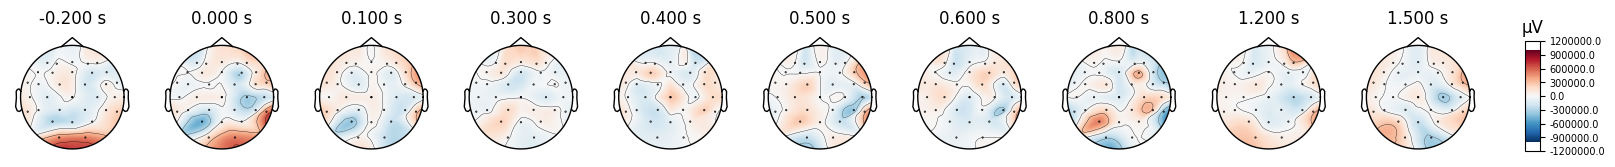

Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 205 samples (1.025 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


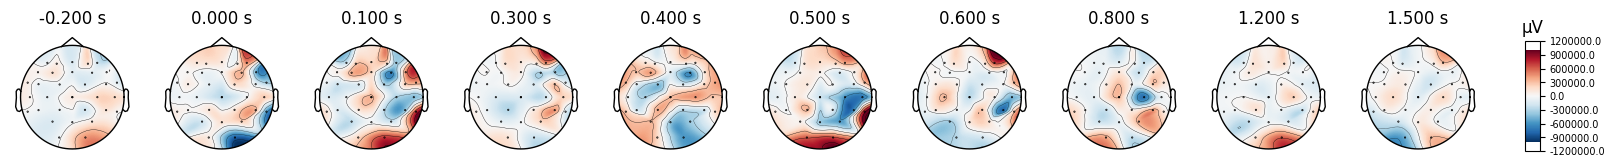

In [150]:
# for filter wise plots
bands= {'theta':(4,8),'alpha':(8,13), 'beta': (13,30)}

for key, val in bands.items():
    
    fig1 = evoked_odd.copy().filter(val[0],val[1]).plot_topomap(times=[-0.2, 0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.8, 1.2, 1.5], vlim=(vmin,vmax))
    fig2 = evoked_typ.copy().filter(val[0],val[1]).plot_topomap(times=[-0.2, 0, 0.1, 0.3, 0.4, 0.5 ,0.6, 0.8, 1.2, 1.5], vlim=(vmin,vmax))

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


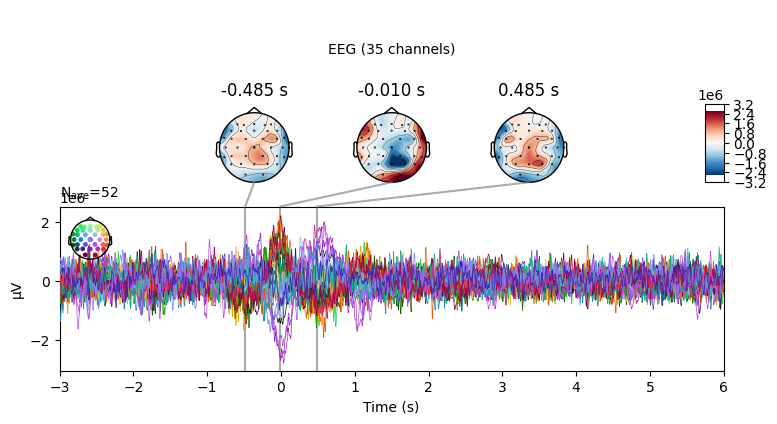

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


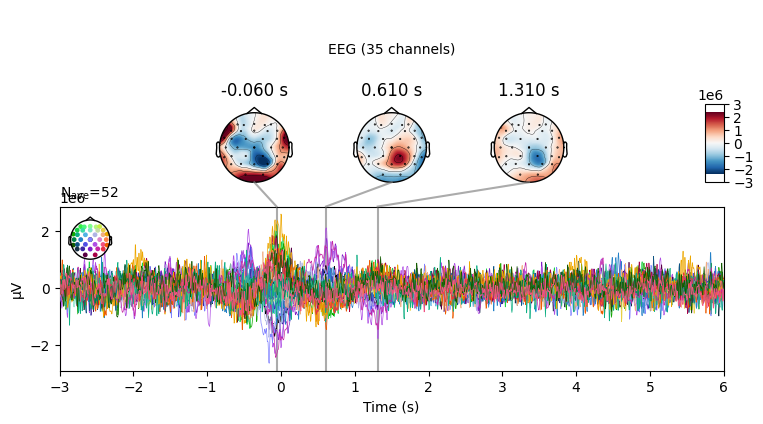

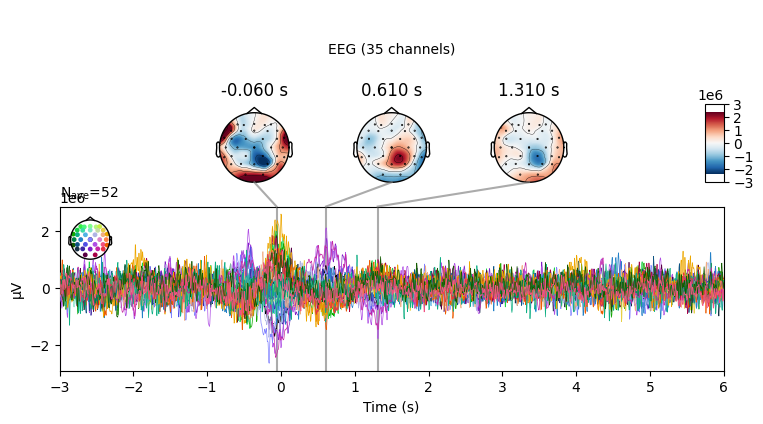

In [39]:
evoked_odd.copy().pick('eeg').plot_joint()
evoked_typ.copy().pick('eeg').plot_joint()

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


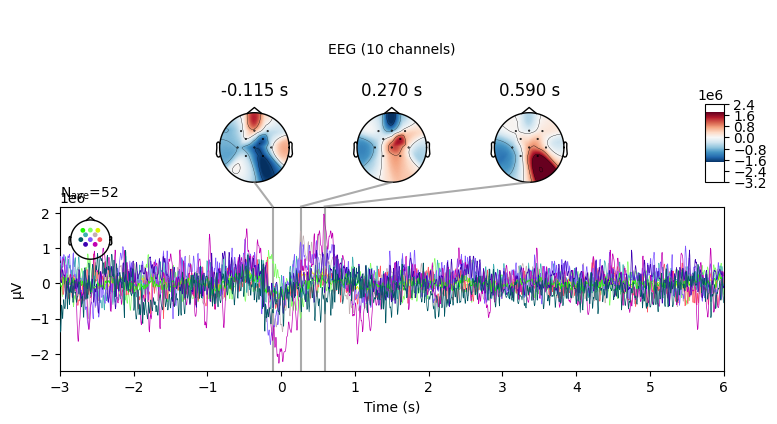

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


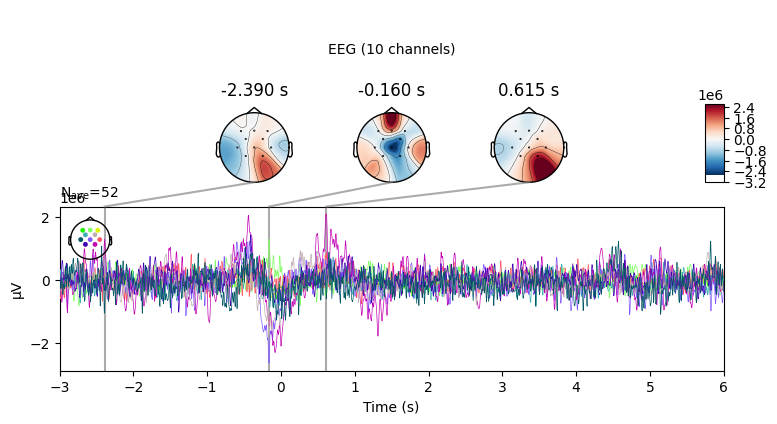

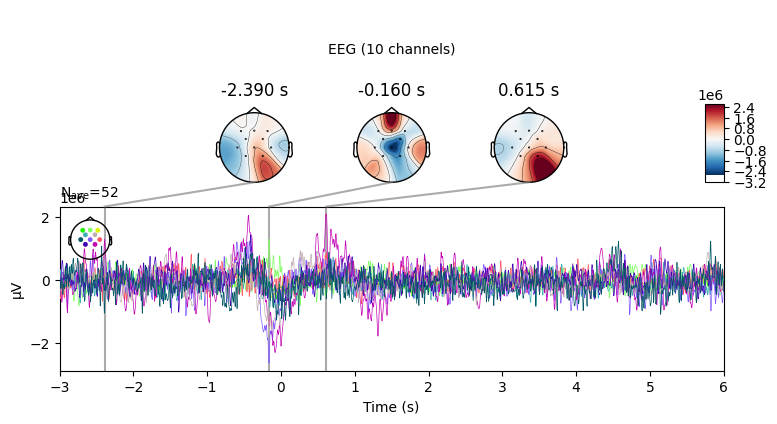

In [40]:
evoked_odd.copy().pick(['F4','Fz','F3','FC2','FC1','C3','Cz','C4','CP2','CP1']).plot_joint()
evoked_typ.copy().pick(['F4','Fz','F3','FC2','FC1','C3','Cz','C4','CP2','CP1']).plot_joint()

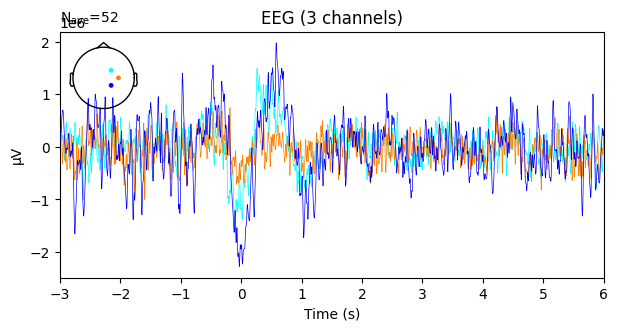

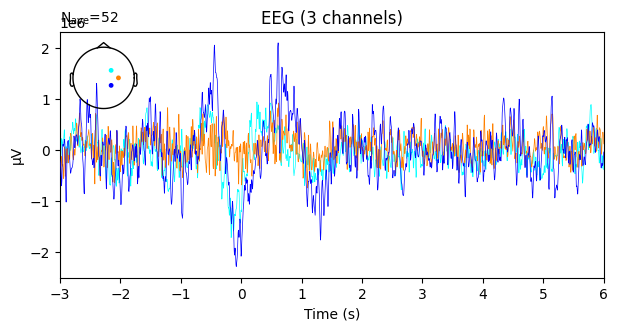

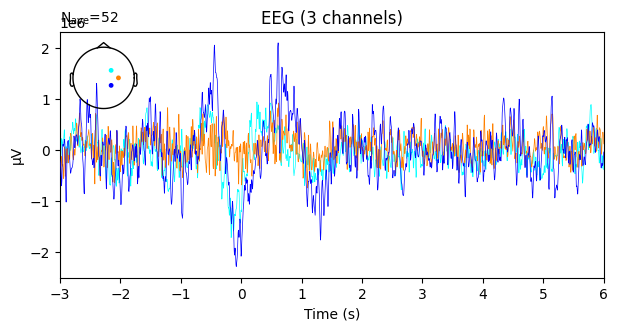

In [43]:
evoked_odd.copy().pick(['FC2','C4','CP2']).plot()
evoked_typ.copy().pick(['FC2','C4','CP2']).plot()

# Time freq Analysis

In [21]:
tmin, tmax = -2, 4
baseline = (-2, 4)  # baseline interval (in s)
freqs = np.arange(1, 40)  # frequencies from 2-100Hz

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

epochs_dbs = [epochs_aff_typ.copy().pick(['dbs']), epochs_aff_odd.copy().pick(['dbs'])]

epochs = [epochs_aff_typ.copy().pick(['F4','Fz','F3','FC2','FC1','C3','Cz','C4','CP2','CP1']), epochs_aff_odd.copy().pick(['F4','Fz','F3','FC2','FC1','C3','Cz','C4','CP2','CP1'])]

#del epochs_aff_typ, epochs_aff_odd

tfrs = []
for epoch in epochs:
    
    tfrs1 = tfr_multitaper(
            epoch,
            freqs=freqs,
            n_cycles=7,
            use_fft=True,
            return_itc=False,
            average=False,
            decim=2,
        )

    #p1 = np.log10(tfrs1.data)
    #nave = len(tfrs1)
    #power2 = mne.time_frequency.AverageTFR(tfrs1.info, p1, tfrs1.times, freqs, nave=nave, comment=None, method=None, verbose=None)

    tfrs1.apply_baseline(baseline, mode="percent")
    tfrs1.crop(tmin, tmax)
    tfrs.append(tfrs1)

tfrs_dbs = []
for epoch in epochs_dbs:
    
    tfrs1_dbs = tfr_multitaper(
            epoch,
            freqs=freqs,
            n_cycles=7,
            use_fft=True,
            return_itc=False,
            average=False,
            decim=2,
        )
    tfrs1_dbs.apply_baseline(baseline, mode="percent")
    tfrs1_dbs.crop(tmin, tmax)
    tfrs_dbs.append(tfrs1_dbs)

Adding metadata with 9 columns
Applying baseline correction (mode: percent)
Adding metadata with 9 columns
Applying baseline correction (mode: percent)
Adding metadata with 9 columns
Applying baseline correction (mode: percent)
Adding metadata with 9 columns
Applying baseline correction (mode: percent)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
N

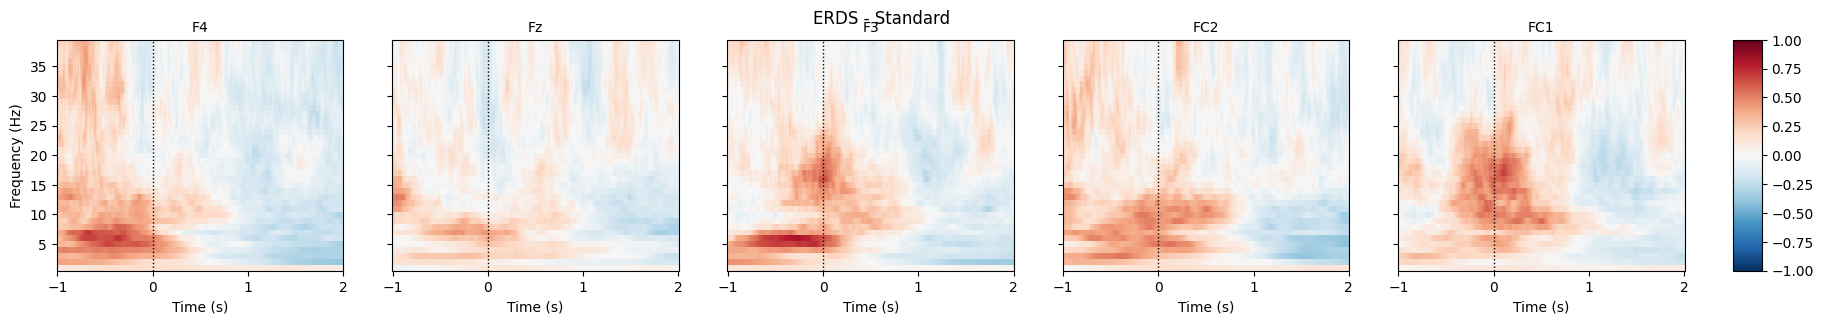

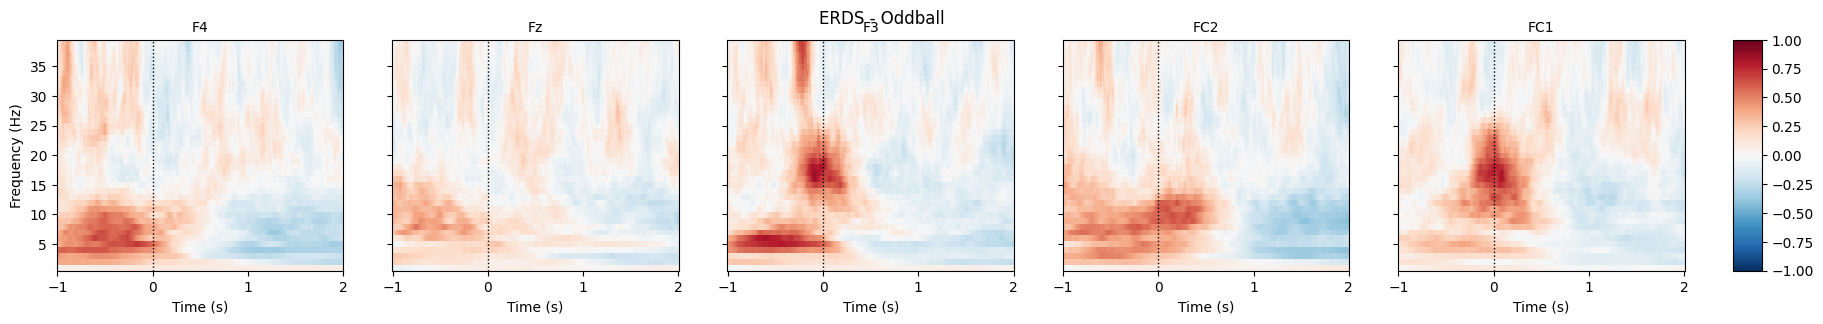

In [22]:
vmin, vmax = -1, 1  # set min and max ERDS values in plot

cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

for n in range(len(tfrs)):
    chs =[]
    for i in range(len(epochs[n].info.ch_names)):
        if  epochs[n].info.ch_names[i] == 'F4' or epochs[n].info.ch_names[i] == 'Fz' or epochs[n].info.ch_names[i] == 'F3' or epochs[n].info.ch_names[i] == 'FC2' or epochs[n].info.ch_names[i] == 'FC1' :
            chs.append(i)

    fig, axes = plt.subplots(
            1, 6, figsize=(22, 3), gridspec_kw={"width_ratios": [10, 10, 10, 10, 10, 1]}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):

        #p1 = 10*np.log10(tfrs[n].average().data)
        #nave = len(tfrs[n])
        #tt = mne.time_frequency.AverageTFR(tfrs[n].info, p1, tfrs[n].times, freqs, nave=nave, comment=None, method=None, verbose=None)
        
        tfrs[n].average().plot(
                    [epochs[n].info.ch_names[chs[ch]]],
                    cnorm=cnorm,
                    tmin=-1,
                    tmax= 2,            
                    axes=ax,
                    colorbar=False,
                    show=False,
                )
        ax.set_title(epochs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
N

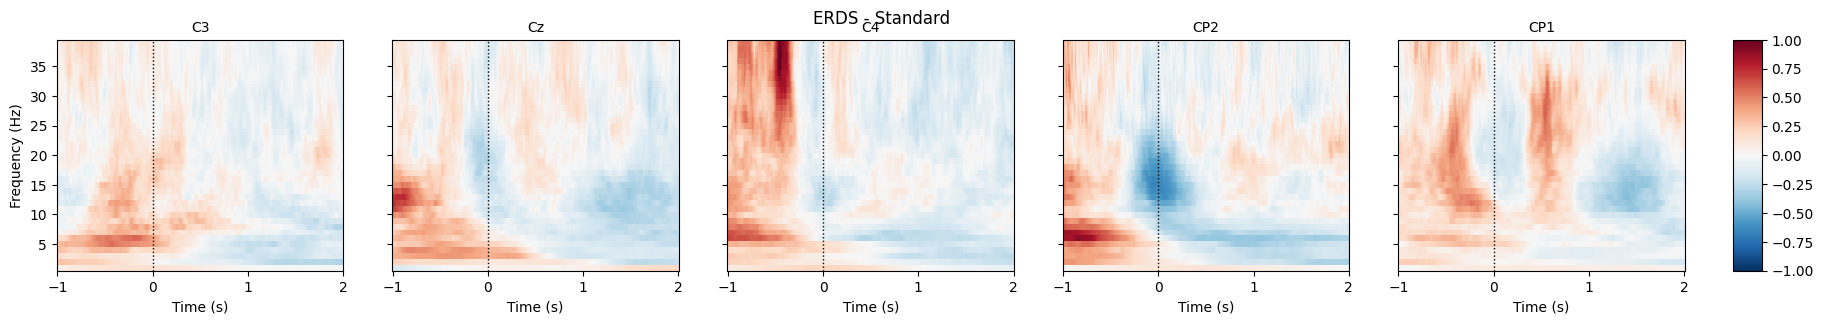

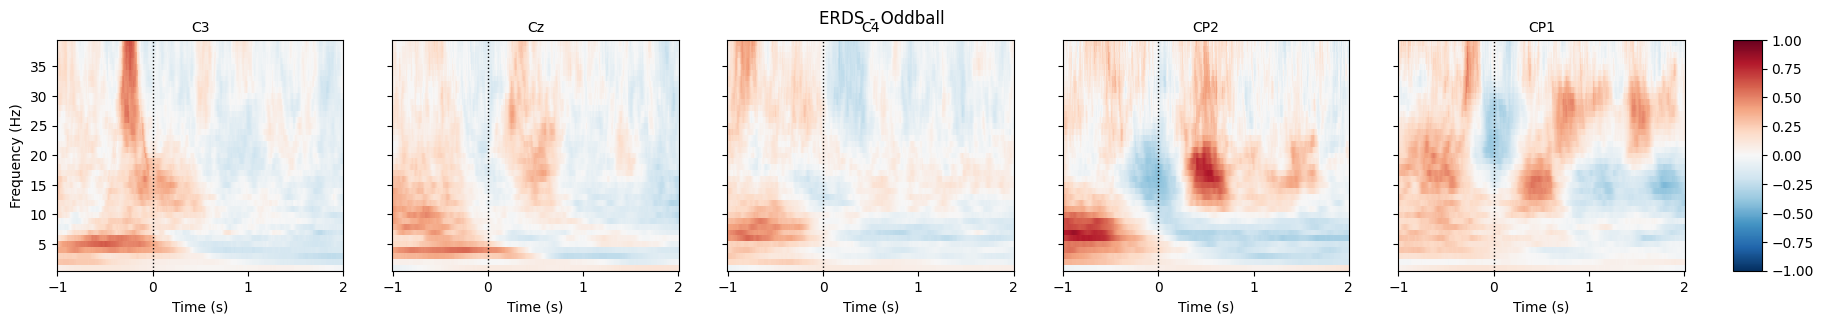

In [23]:
for n in range(len(tfrs)):
    chs =[]
    for i in range(len(epochs[n].info.ch_names)):
        if  epochs[n].info.ch_names[i] == 'C3' or epochs[n].info.ch_names[i] == 'Cz' or epochs[n].info.ch_names[i] == 'C4' or epochs[n].info.ch_names[i] == 'CP2' or epochs[n].info.ch_names[i] == 'CP1':
            chs.append(i)

    fig, axes = plt.subplots(
            1, len(chs)+1, figsize=(22, 3), gridspec_kw={"width_ratios": [10, 10, 10, 10, 10, 1]}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):
        tfrs[n].average().plot(
                    [epochs[n].info.ch_names[chs[ch]]],
                    tmin=-1,
                    tmax= 2,
                    cnorm=cnorm,
                    axes=ax,
                    colorbar=False,
                    show=False,
                )
        ax.set_title(epochs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


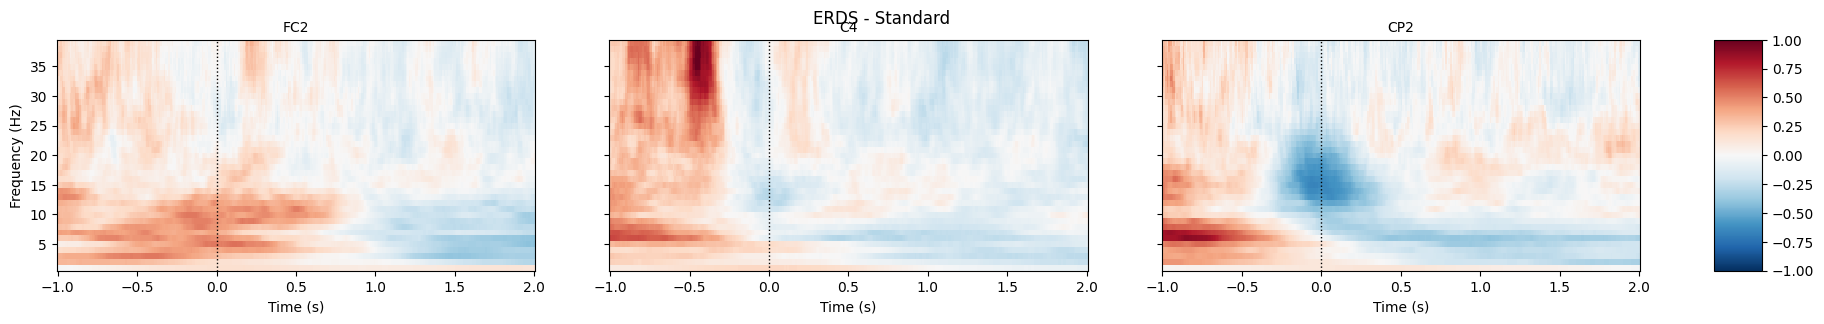

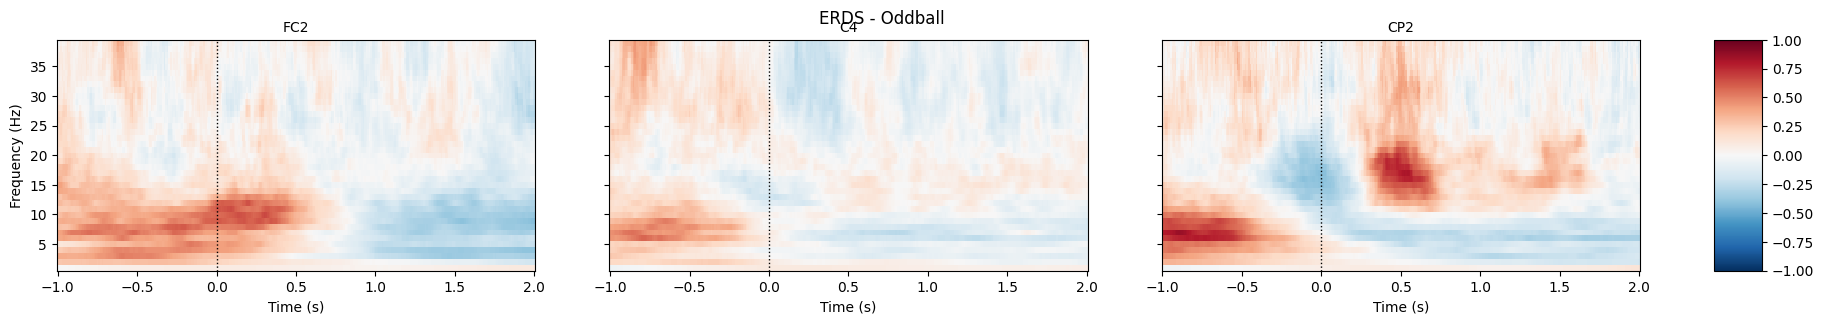

In [24]:
for n in range(len(tfrs)):
    chs =[]
    for i in range(len(epochs[n].info.ch_names)):
        if  epochs[n].info.ch_names[i] == 'C4' or epochs[n].info.ch_names[i] == 'CP2' or epochs[n].info.ch_names[i] == 'FC2':
            chs.append(i)

    fig, axes = plt.subplots(
            1, len(chs)+1, figsize=(22, 3), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):
        tfrs[n].average().plot(
                    [epochs[n].info.ch_names[chs[ch]]],
                    tmin=-1,
                    tmax= 2,
                    cnorm=cnorm,
                    axes=ax,
                    colorbar=False,
                    show=False,
                )
        ax.set_title(epochs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

Using a threshold of 1.675285
stat_fun(H1): min=-9.268138 max=6.979267
Running initial clustering …
Found 28 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-9.268138 max=6.979267
Running initial clustering …
Found 40 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-5.928918 max=4.219734
Running initial clustering …
Found 38 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-5.928918 max=4.219734
Running initial clustering …
Found 59 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-8.790172 max=8.708475
Running initial clustering …
Found 28 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-8.790172 max=8.708475
Running initial clustering …
Found 30 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-9.933673 max=6.360138
Running initial clustering …
Found 34 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-9.933673 max=6.360138
Running initial clustering …
Found 43 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-7.760317 max=4.851104
Running initial clustering …
Found 34 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-7.760317 max=4.851104
Running initial clustering …
Found 53 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-8.705302 max=7.495360
Running initial clustering …
Found 37 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-8.705302 max=7.495360
Running initial clustering …
Found 42 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-8.121630 max=4.482276
Running initial clustering …
Found 51 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-8.121630 max=4.482276
Running initial clustering …
Found 59 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-5.555667 max=8.935145
Running initial clustering …
Found 23 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-5.555667 max=8.935145
Running initial clustering …
Found 59 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-9.184557 max=6.033670
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-9.184557 max=6.033670
Running initial clustering …
Found 44 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.675285
stat_fun(H1): min=-7.683857 max=4.997977
Running initial clustering …
Found 18 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.675285
stat_fun(H1): min=-7.683857 max=4.997977
Running initial clustering …
Found 58 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 3 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


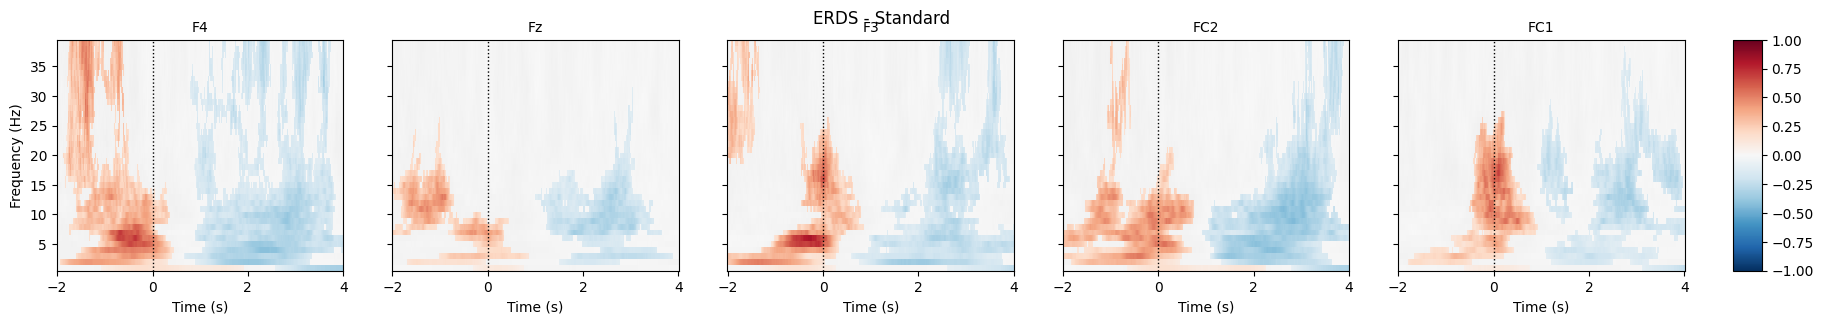

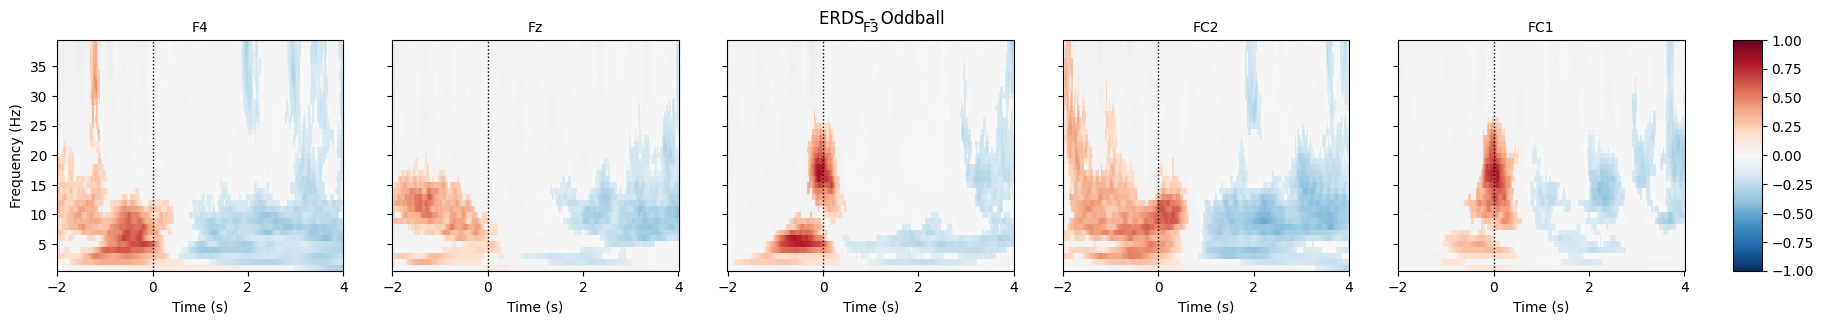

In [25]:
for n in range(len(tfrs)):
    chs =[]
    for i in range(len(epochs[n].info.ch_names)):
        if  epochs[n].info.ch_names[i] == 'F4' or epochs[n].info.ch_names[i] == 'Fz' or epochs[n].info.ch_names[i] == 'F3' or epochs[n].info.ch_names[i] == 'FC2' or epochs[n].info.ch_names[i] == 'FC1' :
            chs.append(i)

    fig, axes = plt.subplots(
            1, 6, figsize=(22, 3), gridspec_kw={"width_ratios": [10, 10, 10, 10, 10, 1]}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):
        _, c1, p1, _ = pcluster_test(tfrs[n].data[:, chs[ch]], tail=1, **kwargs)
            # negative clusters
        _, c2, p2, _ = pcluster_test(tfrs[n].data[:, chs[ch]], tail=-1, **kwargs)
        
                # note that we keep clusters with p <= 0.05 from the combined clusters
                # of two independent tests; in this example, we do not correct for
                # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values

        mask = c[..., p <= 0.05].any(axis=-1)
        # plot TFR (ERDS map with masking)
        tfrs[n].average().plot(
                    [epochs[n].info.ch_names[chs[ch]]],
                    cnorm=cnorm,
                    axes=ax,
                    colorbar=False,
                    show=False,
                    mask = mask,
                    mask_style="mask",
                )
        ax.set_title(epochs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

In [ ]:
for n in range(len(tfrs)):
    chs =[]
    for i in range(len(epochs[n].info.ch_names)):
        if  epochs[n].info.ch_names[i] == 'C3' or epochs[n].info.ch_names[i] == 'Cz' or epochs[n].info.ch_names[i] == 'C4' or epochs[n].info.ch_names[i] == 'CP2' or epochs[n].info.ch_names[i] == 'CP1':
            chs.append(i)

    fig, axes = plt.subplots(
            1, len(chs)+1, figsize=(22, 3), gridspec_kw={"width_ratios": [10, 10, 10, 10, 10, 1]}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):
        _, c1, p1, _ = pcluster_test(tfrs[n].data[:, chs[ch]], tail=1, **kwargs)
            # negative clusters
        _, c2, p2, _ = pcluster_test(tfrs[n].data[:, chs[ch]], tail=-1, **kwargs)
        
                # note that we keep clusters with p <= 0.05 from the combined clusters
                # of two independent tests; in this example, we do not correct for
                # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values

        mask = c[..., p <= 0.05].any(axis=-1)
        # plot TFR (ERDS map with masking)
        tfrs[n].average().plot(
                    [epochs[n].info.ch_names[chs[ch]]],
                    cnorm=cnorm,
                    axes=ax,
                    colorbar=False,
                    show=False,
                    mask = mask,
                    mask_style="mask",
                )
        ax.set_title(epochs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

In [ ]:
for n in range(len(tfrs)):
    chs =[]
    for i in range(len(epochs[n].info.ch_names)):
        if  epochs[n].info.ch_names[i] == 'C4' or epochs[n].info.ch_names[i] == 'CP2' or epochs[n].info.ch_names[i] == 'FC2':
            chs.append(i)

    fig, axes = plt.subplots(
            1, len(chs)+1, figsize=(22, 3), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):
        _, c1, p1, _ = pcluster_test(tfrs[n].data[:, chs[ch]], tail=1, **kwargs)
            # negative clusters
        _, c2, p2, _ = pcluster_test(tfrs[n].data[:, chs[ch]], tail=-1, **kwargs)
        
                # note that we keep clusters with p <= 0.05 from the combined clusters
                # of two independent tests; in this example, we do not correct for
                # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values

        mask = c[..., p <= 0.05].any(axis=-1)
        # plot TFR (ERDS map with masking)
        tfrs[n].average().plot(
                    [epochs[n].info.ch_names[chs[ch]]],
                    cnorm=cnorm,
                    axes=ax,
                    colorbar=False,
                    show=False,
                    mask = mask,
                    mask_style="mask",
                )
        ax.set_title(epochs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

In [ ]:
if sub == '015'or sub == '014' or sub == '013' or sub == '011':
    width_ratios = [10, 10, 10, 10,10, 10, 10, 10, 1]

elif sub == '008' or sub == '007':
    width_ratios =  [10, 10, 10, 10, 1]


for n in range(len(tfrs_dbs)):
    chs = list(range(0, len(epochs_dbs[0].info.ch_names)))

    fig, axes = plt.subplots(
            1, len(chs)+1, figsize=(22, 3), gridspec_kw={"width_ratios": width_ratios}
        )
    # positive clusters
    for ch, ax in enumerate(axes[:-1]):
        _, c1, p1, _ = pcluster_test(tfrs_dbs[n].data[:, chs[ch]], tail=1, **kwargs)
            # negative clusters
        _, c2, p2, _ = pcluster_test(tfrs_dbs[n].data[:, chs[ch]], tail=-1, **kwargs)
        
                # note that we keep clusters with p <= 0.05 from the combined clusters
                # of two independent tests; in this example, we do not correct for
                # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values

        mask = c[..., p <= 0.05].any(axis=-1)
        # plot TFR (ERDS map with masking)
        tfrs_dbs[n].average().plot(
                    [epochs_dbs[n].info.ch_names[chs[ch]]],
                    cnorm=cnorm,
                    axes=ax,
                    colorbar=False,
                    show=False,
                    mask = mask,
                    mask_style="mask",
                )
        ax.set_title(epochs_dbs[0].info.ch_names[chs[ch]], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS - {aff_cond_plot[n]}")

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...
Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


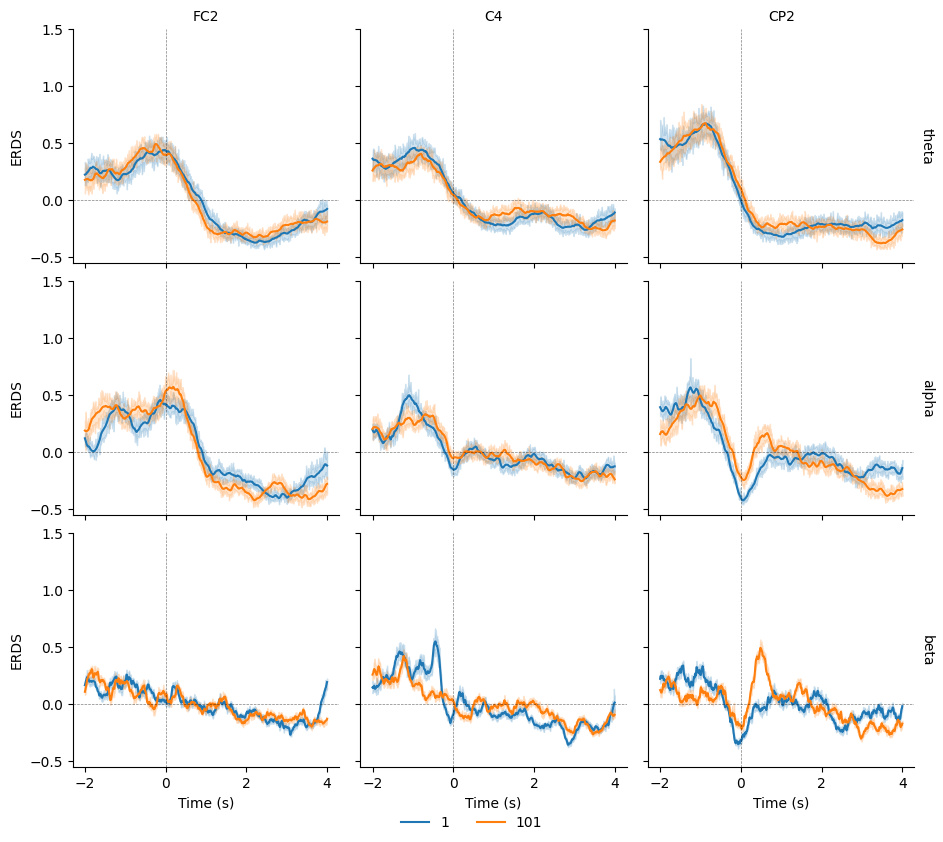

In [26]:
df1 = tfrs[0].copy().pick(['FC2','C4','CP2']).to_data_frame(time_format=None, long_format=True)
df2 = tfrs[1].copy().pick(['FC2','C4','CP2']).to_data_frame(time_format=None, long_format=True)
frames = [df1, df2]
df = pd.concat(frames)
# Map to frequency bands:
freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 90}

df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ["theta", "alpha", "beta"]
df = df[df.band.isin(freq_bands_of_interest)]
df["band"] = df["band"].cat.remove_unused_categories()

# Order channels for plotting:
# df["channel"] = df["channel"].cat.reorder_categories(('F4','Fz','F3','FC2','FC1','C3','Cz','C4','CP2','CP1'), ordered=True)

df["channel"] = df["channel"].cat.reorder_categories(('FC2','C4','CP2'), ordered=True)


g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
g.set(ylim=(None, 1.5))
g.set_axis_labels("Time (s)", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc="lower center")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...
Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


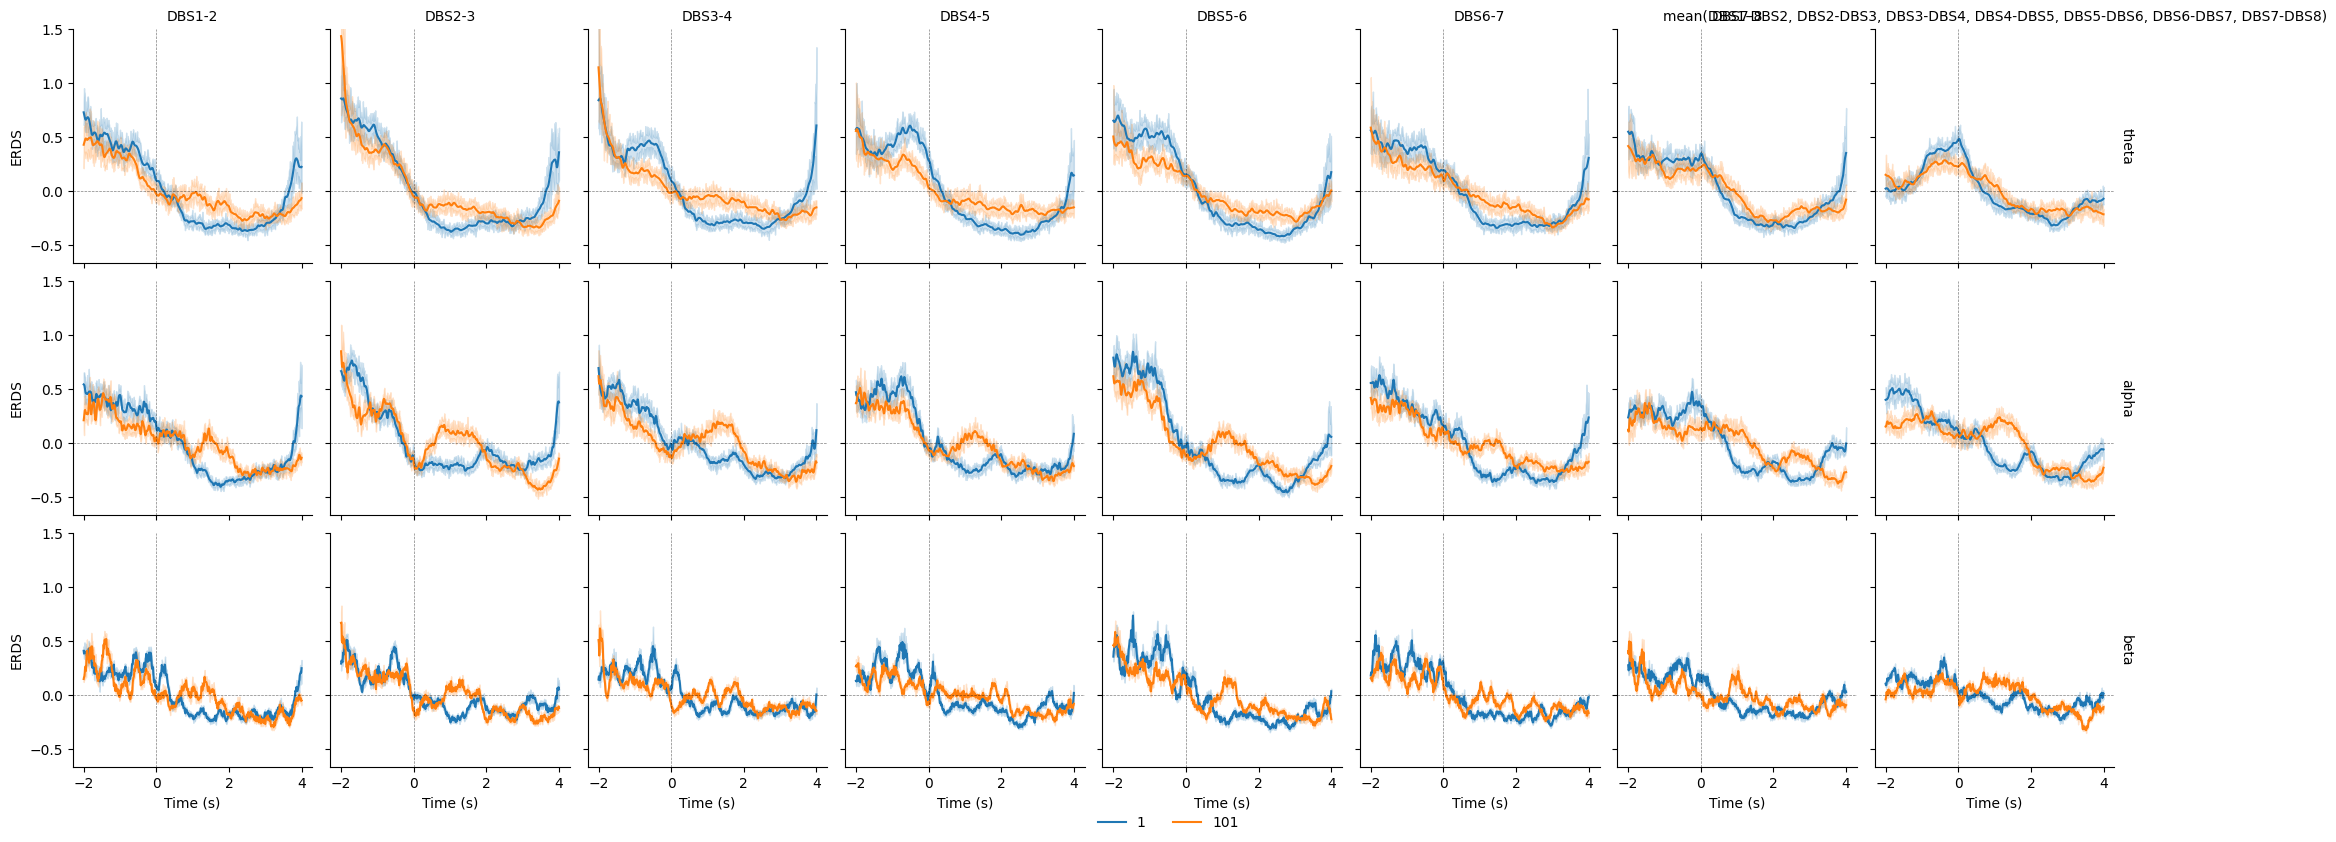

In [27]:
df1 = tfrs_dbs[0].to_data_frame(time_format=None, long_format=True)
df2 = tfrs_dbs[1].to_data_frame(time_format=None, long_format=True)
frames = [df1, df2]
df = pd.concat(frames)
# Map to frequency bands:
freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 90}

df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ["theta", "alpha", "beta"]
df = df[df.band.isin(freq_bands_of_interest)]
df["band"] = df["band"].cat.remove_unused_categories()

# Order channels for plotting:

#df["channel"] = df["channel"].cat.reorder_categories(('FC2','C4','CP2'), ordered=True)


g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
g.set(ylim=(None, 1.5))
g.set_axis_labels("Time (s)", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc="lower center")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

Plots

In [4]:
base_dir = "E:/Oddball Data/"
subj_list=['007','008','011','013','014','015']

subj_list=['007']

stage=['implant']
aff_cond=['1', '101'];
naff_cond=['10', '110'];

# layout
xy = pd.read_csv(base_dir+"xy_pos_layout.csv")
xy = np.array(xy)
ch_names = ['FP1','FP2','AF7','AF3','AFz','AF4','AF8','F7','F3','Fz','F4','F8','FT9','FC5','FC1',
'FC2','FC6','FT10','T7','C3','Cz','C4','T8','TP9','TP10','CP5','CP1''CP2','CP6','P7','P3','Pz','P4',
'P8','O1','O2','COMNT','SCALE']

layout=mne.channels.generate_2d_layout(xy, w=0.12, h=0.1, pad=0.02, ch_names=ch_names, ch_indices=None, name='eeg', bg_image=None, normalize=True)

tfr_dif=[]
tfr_contrast=[]

for sub in subj_list:
    for st in stage:
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        if sub == '015' or sub=='014' or sub=='013' or sub=='011':
            seed_chs = ['DBS1-2','DBS2-3','DBS3-4','DBS4-5','DBS5-6','DBS6-7','DBS7-8','mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)']
        elif sub =='007' or sub == '008':
            seed_chs = ['DBS1-234','DBS234-567','DBS567-8', 'mean(DBS1-234, DBS234-567, DBS567-8)']
        
        for seed_ch in seed_chs:
            tfr_odd = mne.time_frequency.read_tfrs(data_dir+ 'tfr_odd'+st+seed_ch+'-tfr.h5')
            tfr_typ = mne.time_frequency.read_tfrs(data_dir+ 'tfr_typ'+st+seed_ch+'-tfr.h5')
            tfr_dif.append(tfr_odd[0]-tfr_typ[0])
            tfr_contrast.append(mne.combine_evoked([tfr_odd[0], tfr_typ[0]], weights=[1, -1]))

Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_oddimplantDBS1-234-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_typimplantDBS1-234-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_oddimplantDBS234-567-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_typimplantDBS234-567-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_oddimplantDBS567-8-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_typimplantDBS567-8-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_oddimplantmean(DBS1-234, DBS234-567, DBS567-8)-tfr.h5 ...
Reading E:/Oddball Data/EDEN007/ANALYSIS/tfr_typimplantmean(DBS1-234, DBS234-567, DBS567-8)-tfr.h5 ...


In [30]:
tfr_contrast

[<AverageTFR | time : [-3.000000, 6.000000], freq : [1.000000, 40.000000], nave : 24, channels : 38, ~20.9 MB>,
 <AverageTFR | time : [-3.000000, 6.000000], freq : [1.000000, 40.000000], nave : 24, channels : 38, ~20.9 MB>,
 <AverageTFR | time : [-3.000000, 6.000000], freq : [1.000000, 40.000000], nave : 24, channels : 38, ~20.9 MB>,
 <AverageTFR | time : [-3.000000, 6.000000], freq : [1.000000, 40.000000], nave : 24, channels : 38, ~20.9 MB>]

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Multiple channel types selected, returning one figure per type.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


RuntimeError: No digitization points found.

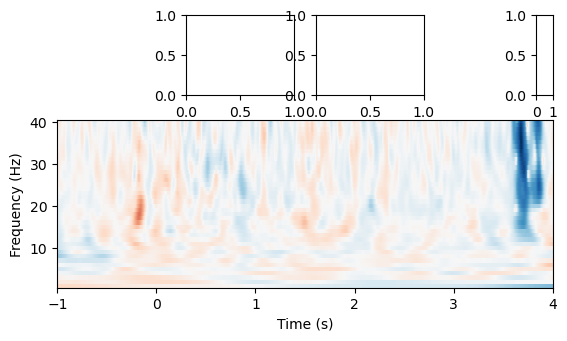

In [31]:
tfr_contrast[0].plot_joint(tmin=-1, tmax=4, timefreqs=[(0.5, 10), (1.3, 8)])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


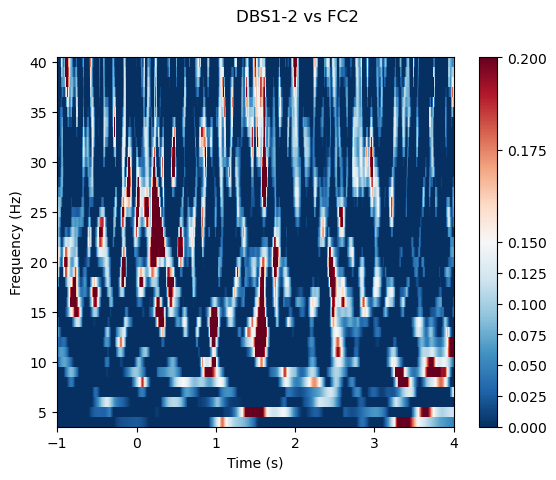

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


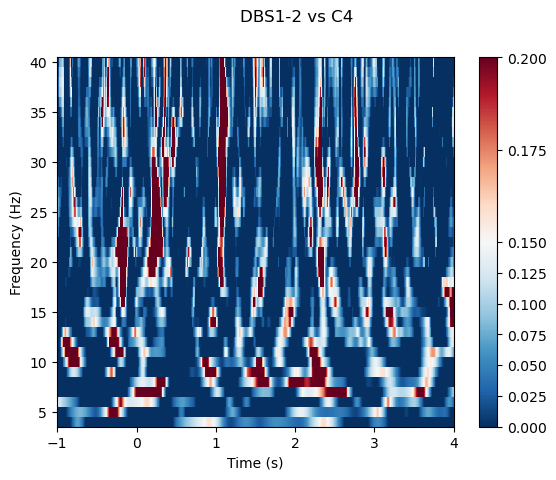

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


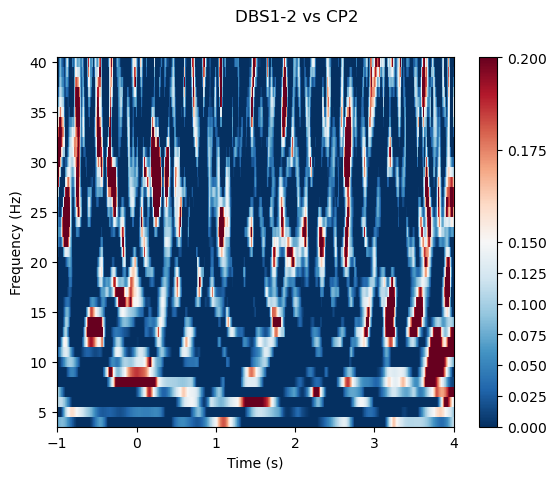

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


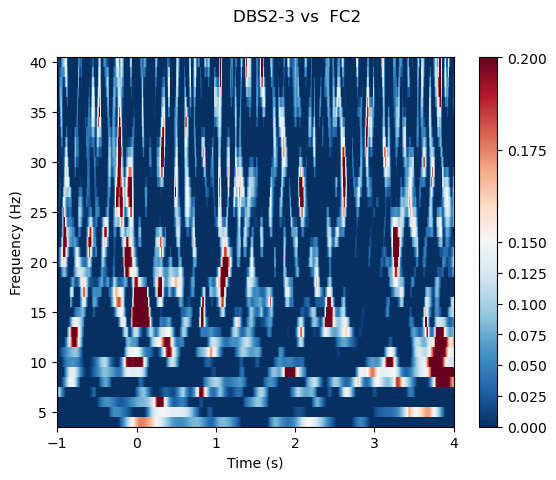

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


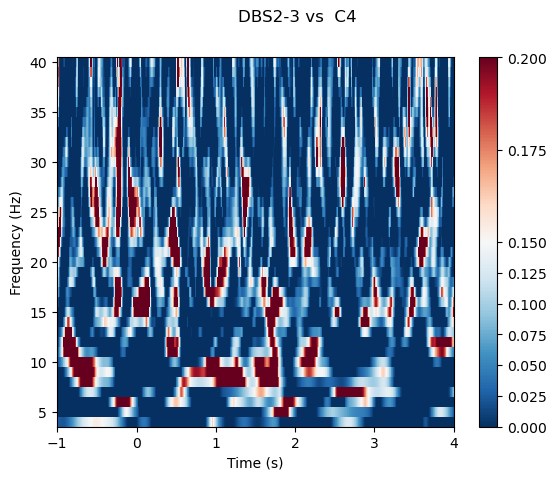

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


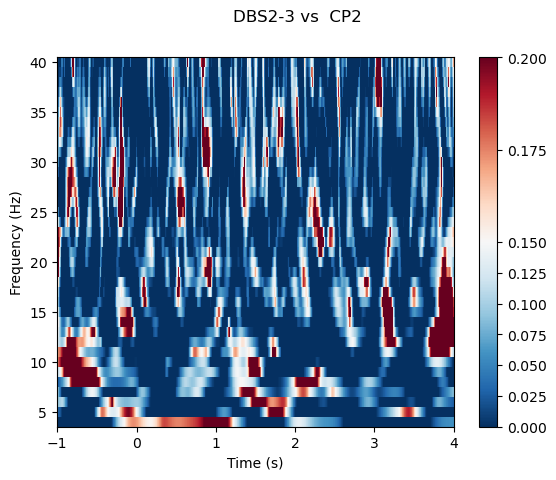

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


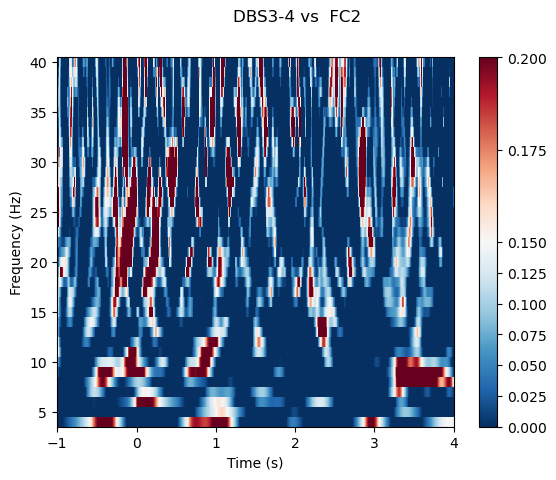

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


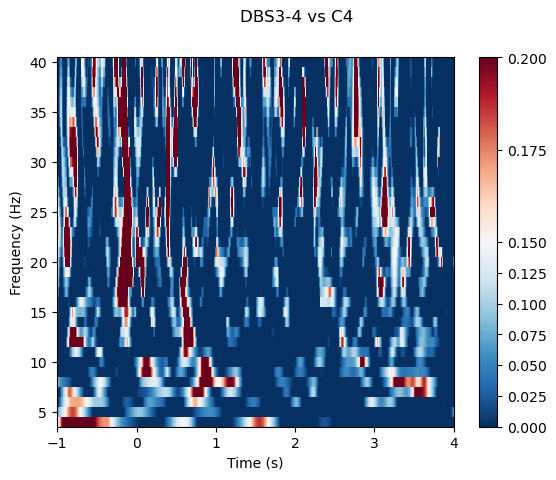

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


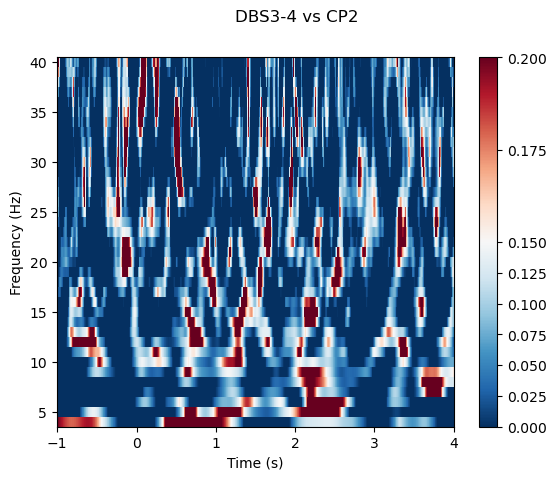

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


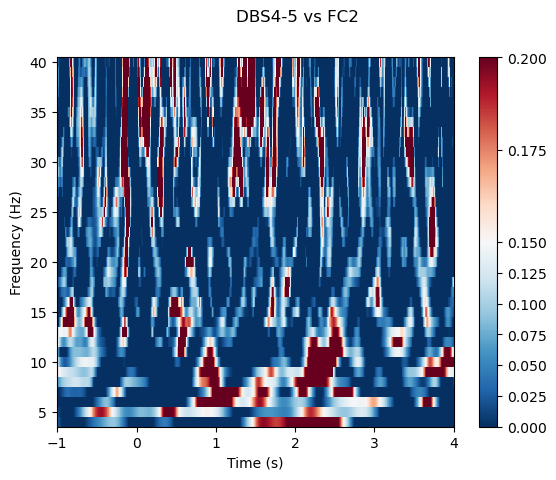

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


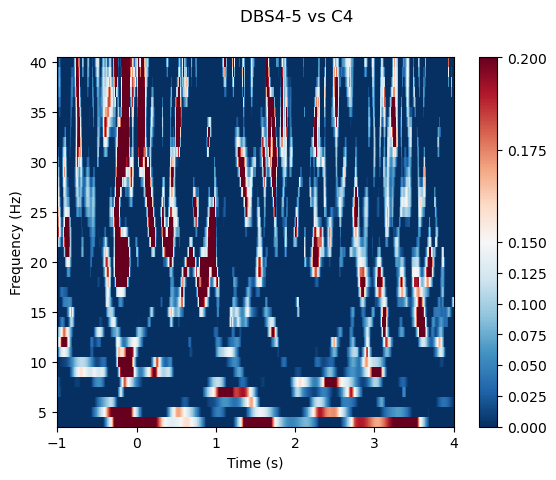

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


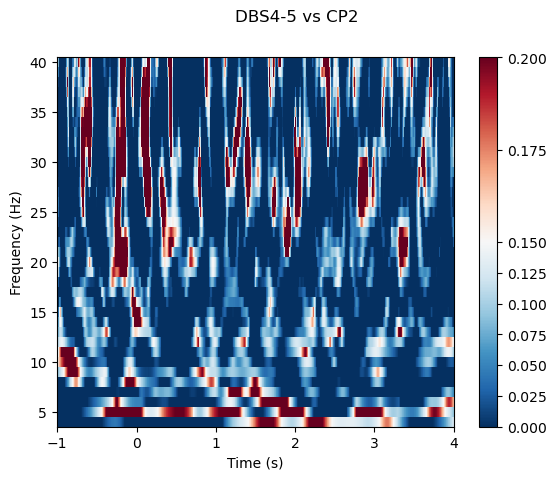

IndexError: list index out of range

In [7]:
vmax,vmin=0.2,0
tmax= 4
fmin = 4
from matplotlib.colors import TwoSlopeNorm

Dbs_name = ['DBS1-2','DBS2-3','DBS3-4','DBS4-5','DBS5-6','DBS6-7','DBS7-8']
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0.15, vmax=vmax)

tfr_contrast[0].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[0]+' vs FC2',layout =layout,cnorm=cnorm)
tfr_contrast[0].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[0]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[0].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[0]+' vs CP2',layout =layout,cnorm=cnorm)

tfr_contrast[1].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title= Dbs_name[1]+' vs  FC2',layout =layout,cnorm=cnorm)
tfr_contrast[1].plot('C4', fmin=4, tmin=-1,tmax=tmax, title= Dbs_name[1]+' vs  C4',layout =layout,cnorm=cnorm)
tfr_contrast[1].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title= Dbs_name[1]+' vs  CP2',layout =layout,cnorm=cnorm)

tfr_contrast[2].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[2]+' vs  FC2',layout =layout,cnorm=cnorm)
tfr_contrast[2].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[2]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[2].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[2]+' vs CP2',layout =layout,cnorm=cnorm)

tfr_contrast[3].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[3]+' vs FC2',layout =layout,cnorm=cnorm)
tfr_contrast[3].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[3]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[3].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[3]+' vs CP2',layout =layout,cnorm=cnorm)

tfr_contrast[4].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title= Dbs_name[4]+' vs  FC2',layout =layout,cnorm=cnorm)
tfr_contrast[4].plot('C4', fmin=4, tmin=-1,tmax=tmax, title= Dbs_name[4]+' vs  C4',layout =layout,cnorm=cnorm)
tfr_contrast[4].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title= Dbs_name[4]+' vs  CP2',layout =layout,cnorm=cnorm)

tfr_contrast[5].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[5]+' vs  FC2',layout =layout,cnorm=cnorm)
tfr_contrast[5].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[5]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[5].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[5]+' vs CP2',layout =layout,cnorm=cnorm)

tfr_contrast[6].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[6]+' vs  FC2',layout =layout,cnorm=cnorm)
tfr_contrast[6].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[6]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[6].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[6]+' vs CP2',layout =layout,cnorm=cnorm)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


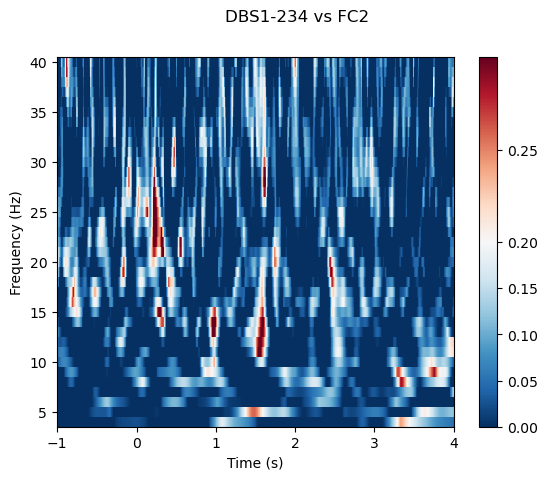

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


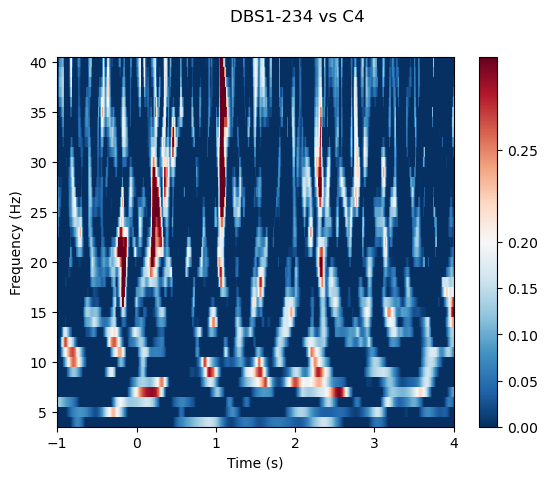

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


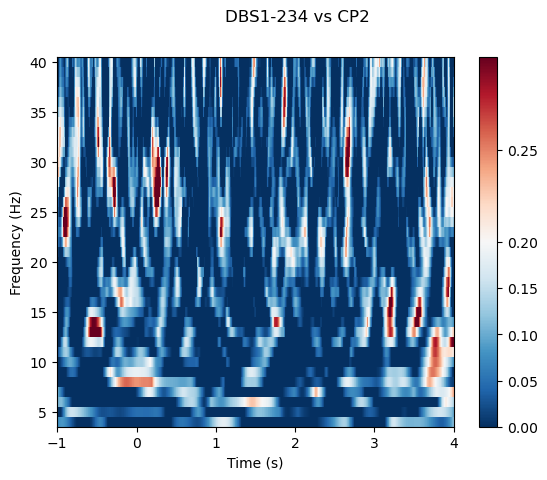

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


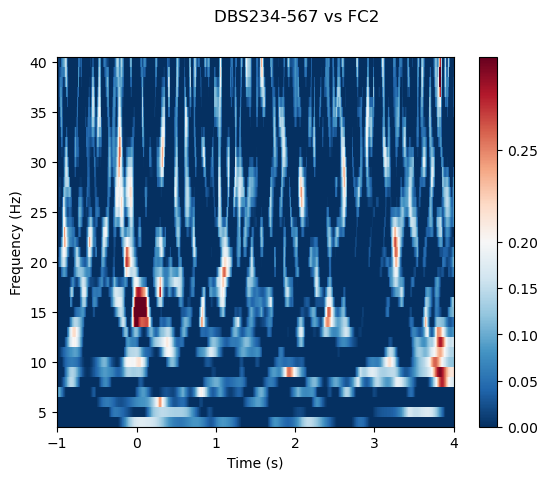

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


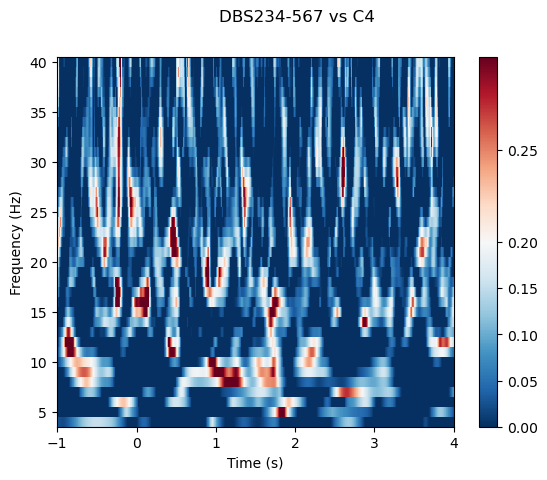

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


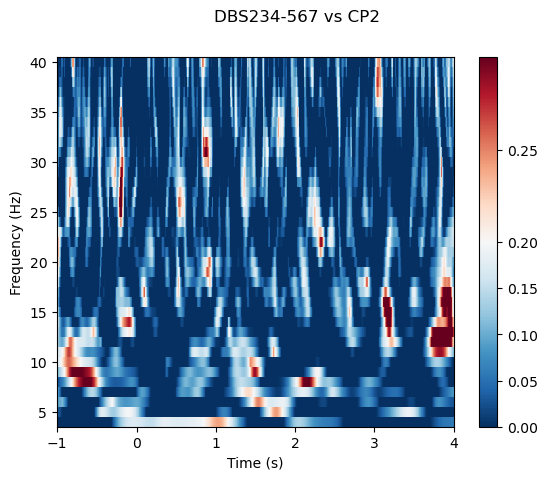

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


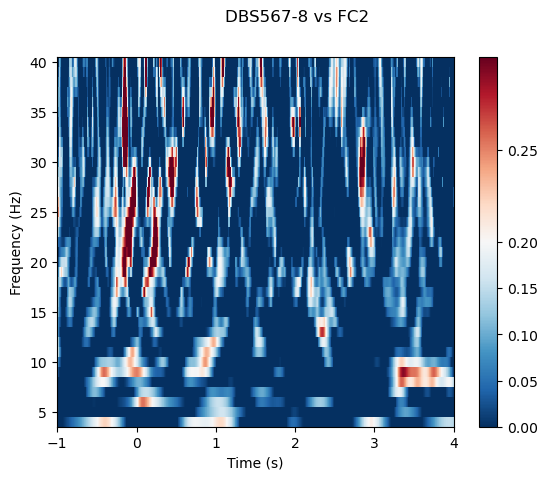

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


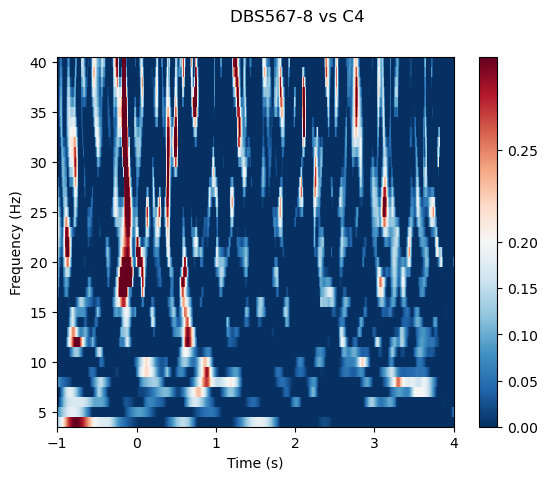

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


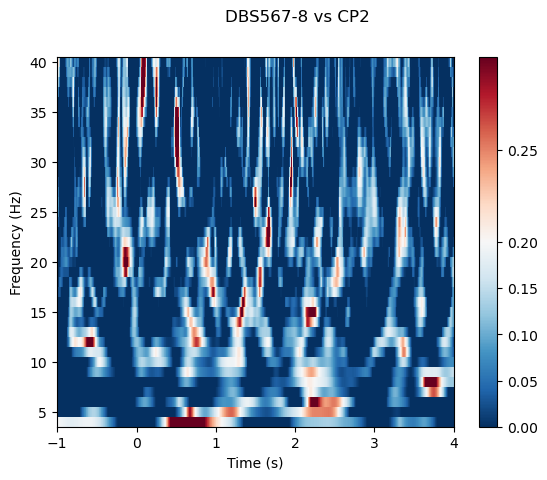

[<Figure size 640x480 with 2 Axes>]

In [8]:
vmax,vmin=0.3,0
tmax= 4
fmin = 4

Dbs_name = ['DBS1-234','DBS234-567','DBS567-8', 'mean(DBS1-234, DBS234-567, DBS567-8)']
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0.2, vmax=vmax)

tfr_contrast[0].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[0]+' vs FC2',layout =layout,cnorm=cnorm)
tfr_contrast[0].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[0]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[0].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[0]+' vs CP2',layout =layout,cnorm=cnorm)

tfr_contrast[1].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[1]+' vs FC2',layout =layout,cnorm=cnorm)
tfr_contrast[1].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[1]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[1].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[1]+' vs CP2',layout =layout,cnorm=cnorm)

tfr_contrast[2].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[2]+' vs FC2',layout =layout,cnorm=cnorm)
tfr_contrast[2].plot('C4', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[2]+' vs C4',layout =layout,cnorm=cnorm)
tfr_contrast[2].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title=Dbs_name[2]+' vs CP2',layout =layout,cnorm=cnorm)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


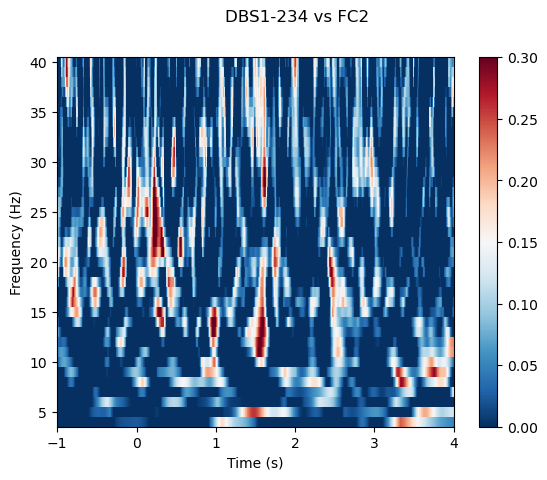

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


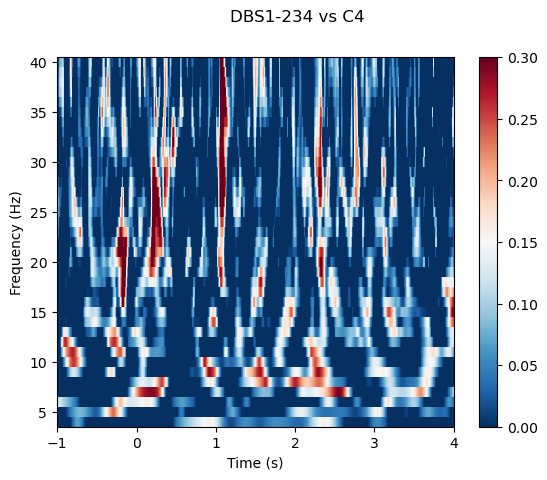

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


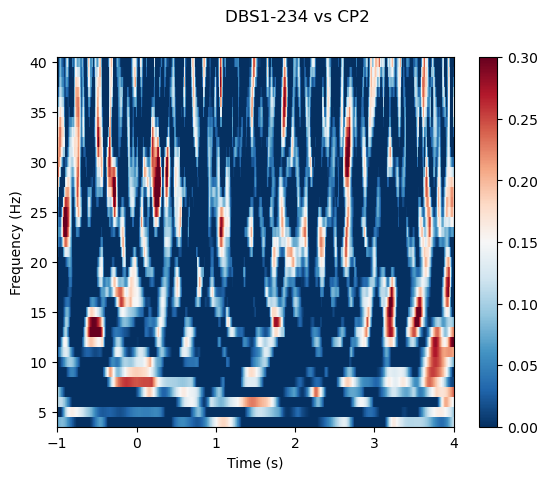

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


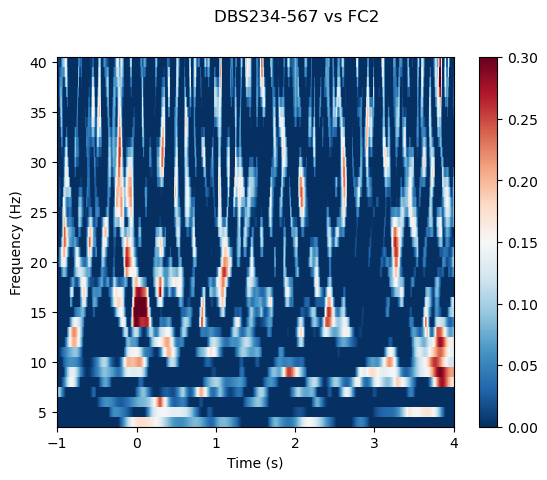

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


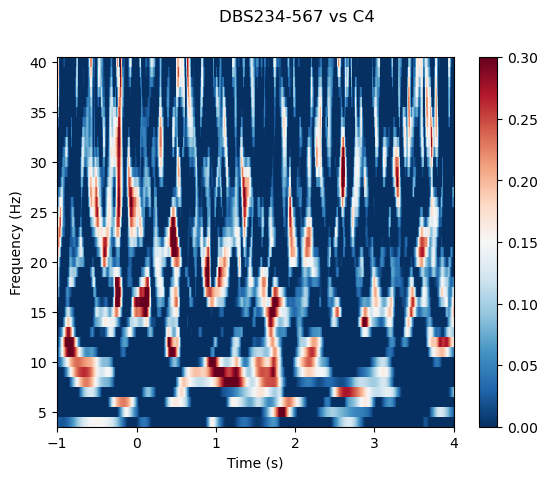

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


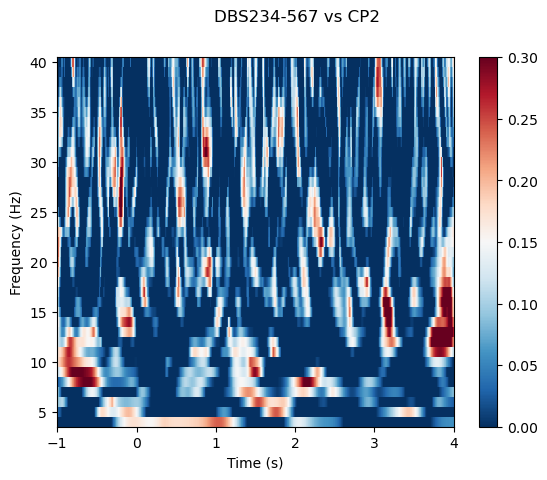

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


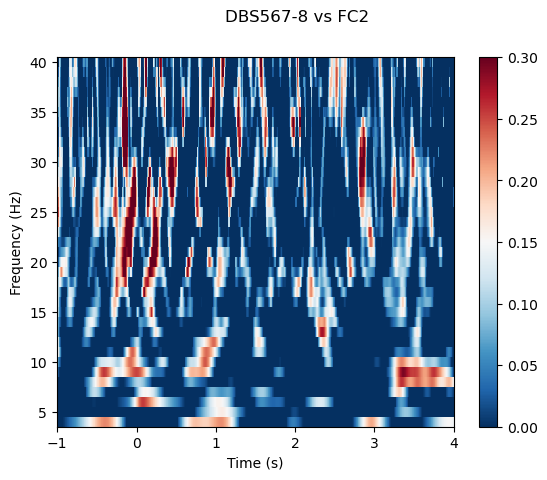

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


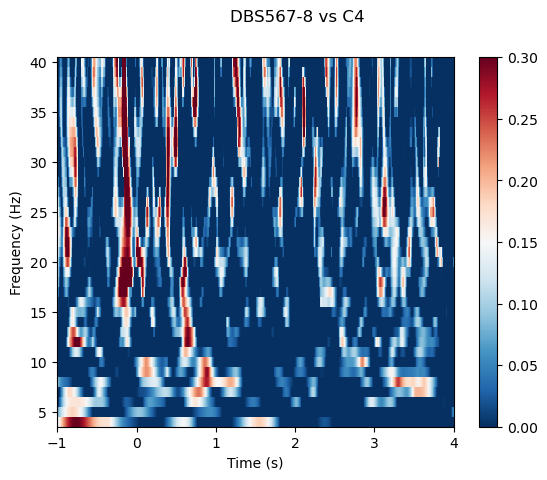

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


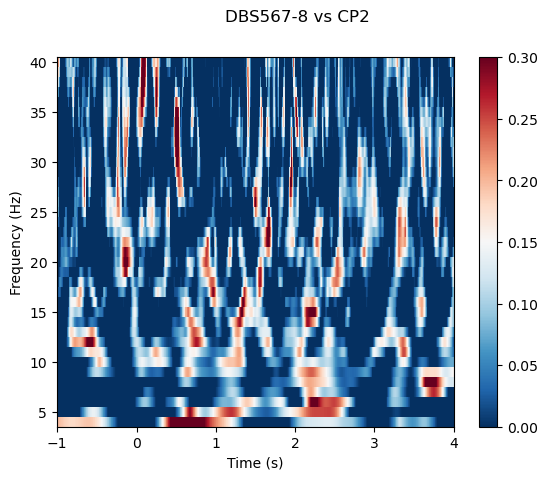

[<Figure size 640x480 with 2 Axes>]

In [9]:
vmax,vmin=0.3,0
tmax= 4
fmin = 4


tfr_dif[0].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title='DBS1-234 vs FC2',layout =layout,vmax=vmax,vmin=vmin)
tfr_dif[0].plot('C4', fmin=4, tmin=-1,tmax=tmax, title='DBS1-234 vs C4',layout =layout,vmax=vmax,vmin=vmin)
tfr_dif[0].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title='DBS1-234 vs CP2',layout =layout,vmax=vmax,vmin=vmin)

tfr_dif[1].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title='DBS234-567 vs FC2',layout =layout,vmax=vmax,vmin=vmin)
tfr_dif[1].plot('C4', fmin=4, tmin=-1,tmax=tmax, title='DBS234-567 vs C4',layout =layout,vmax=vmax,vmin=vmin)
tfr_dif[1].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title='DBS234-567 vs CP2',layout =layout,vmax=vmax,vmin=vmin)

tfr_dif[2].plot('FC2', fmin=4, tmin=-1,tmax=tmax, title='DBS567-8 vs FC2',layout =layout,vmax=vmax,vmin=vmin)
tfr_dif[2].plot('C4', fmin=4, tmin=-1,tmax=tmax, title='DBS567-8 vs C4',layout =layout,vmax=vmax,vmin=vmin)
tfr_dif[2].plot('CP2', fmin=4, tmin=-1,tmax=tmax, title='DBS567-8 vs CP2',layout =layout,vmax=vmax,vmin=vmin)

No baseline correction applied


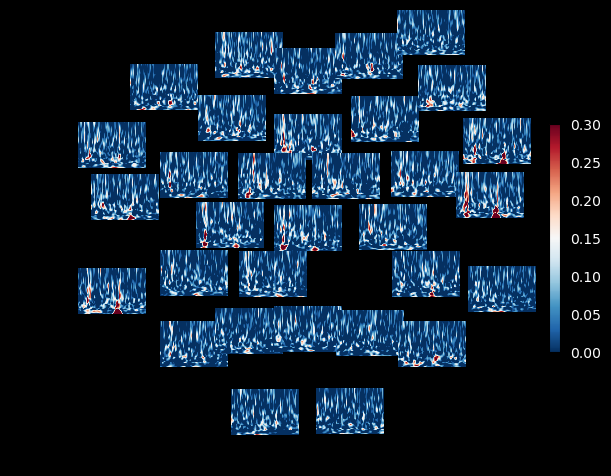

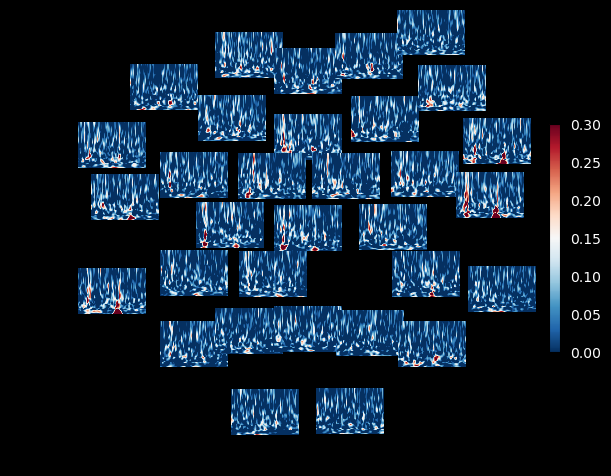

In [10]:
vmax,vmin=0.3,0

tfr_contrast[0].plot_topo(fmin=4, tmin=-1,tmax=tmax,  layout= layout, vmax=vmax,vmin=vmin)


C:\Users\malann\AppData\Local\Temp\ipykernel_736876\1491982392.py:7: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  epochs = mne.read_epochs_fieldtrip(fname,None,data_name='x', trialinfo_column=0)
C:\Users\malann\AppData\Local\Temp\ipykernel_736876\1491982392.py:7: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  epochs = mne.read_epochs_fieldtrip(fname,None,data_name='x', trialinfo_column=0)
C:\Users\malann\AppData\Local\Temp\ipykernel_736876\1491982392.py:7: RuntimeWarning: Cannot guess the correct type of channel FP2. Making it a MISC channel.
  epochs = mne.read_epochs_fieldtrip(fname,None,data_name='x', trialinfo_column=0)
C:\Users\malann\AppData\Local\Temp\ipykernel_736876\149198239

Adding metadata with 9 columns
404 matching events found
No baseline correction applied


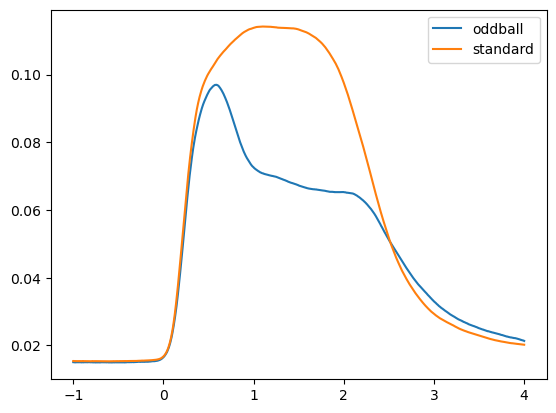

In [10]:
subj_list=['007']
stage = ['implant']
for sub in subj_list:
    for st in stage:
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        fname = data_dir+"data_clean"+st+'.mat'
        epochs = mne.read_epochs_fieldtrip(fname,None,data_name='x', trialinfo_column=0)
        sfreq = epochs.info['sfreq']

        Dynmo_odd = epochs['101'].copy().crop(-1,tmax).get_data(picks='DynL(lc)')
        Dynmo_odd= Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2]).mean(axis=0)
        Dynmo_typ = epochs['1'].copy().crop(-1,tmax).get_data(picks='DynL(lc)')
        Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)
        plt.plot(epochs['101'].copy().crop(-1,tmax).times,Dynmo_odd)
        plt.plot(epochs['1'].copy().crop(-1,tmax).times,Dynmo_typ)
        plt.legend(['oddball','standard'])

In [38]:
tfr_epochs_1 = tfr_odd[0]
tfr_epochs_2 = tfr_typ[0]

epochs_power_1 = tfr_epochs_1.data[:, 0, :, :]  # only 1 channel as 3D matrix
epochs_power_2 = tfr_epochs_2.data[:, 0, :, :]  # only 1 channel as 3D matrix


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [39]:
tfr_epochs_1.data.shape

(38, 40, 1801)

In [70]:
p1 = np.log10(data_Nfreq_aff_odd.data)
nave = len(epochs["1"])
power2 = mne.time_frequency.AverageTFR(data_Nfreq_aff_odd.info, p1, power.times, freqs, nave=nave, comment=None, method=None, verbose=None)

In [13]:
power2.plot([20], title=power2.ch_names[20],baseline=baseline,mode="percent",fmax=30,tmin=-2,tmax=4, vmin=0.05,vmax=-0.05)

NameError: name 'power2' is not defined

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: percent)


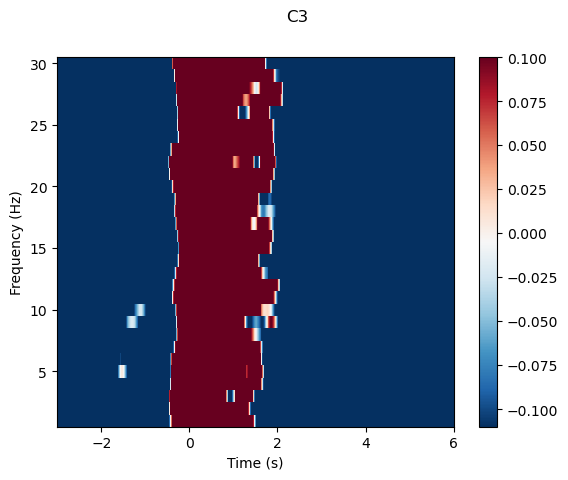

[<Figure size 640x480 with 2 Axes>]

In [60]:
data_Nfreq_aff_odd.plot([20], title=data_Nfreq_aff_odd.ch_names[20],baseline=baseline,mode="percent",fmax=30, vmin=0.1,vmax=-0.1)

In [27]:
power2 = mne.time_frequency.AverageTFR(power.info, p1, power.times, freqs, nave=52, comment=None, method=None, verbose=None)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: percent)


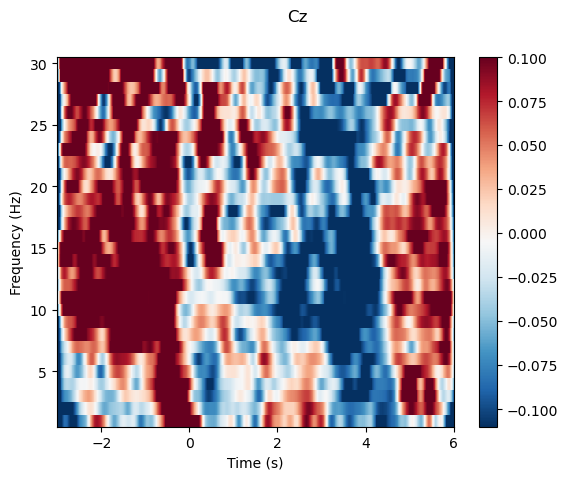

[<Figure size 640x480 with 2 Axes>]

In [28]:
power2.plot([19], title=power.ch_names[19],baseline=baseline,mode="percent",fmax=30, vmin=0.1,vmax=-0.1)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: percent)


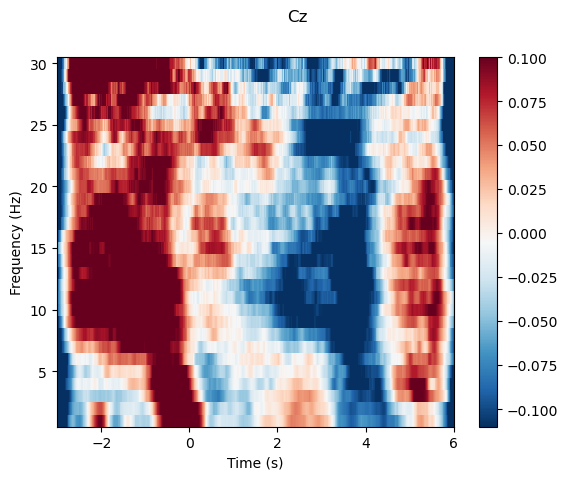

[<Figure size 640x480 with 2 Axes>]

In [264]:
power2.plot([19], title=power.ch_names[19],baseline=baseline,mode="percent",fmax=30, vmin=0.1,vmax=-0.1)